# Search and homing path figure

This is the new figure for the search and homing paths. 

I decide to combine search and homing path to be able to compare them more directly.

In [1]:
%load_ext autoreload
%autoreload 2
%run setup_project.py
prepareSessionsForSpatialAnalysisProject(sSesList,myProject.sessionList,pose_file_extension = ".pose_kf.npy")

Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 39 testing sessions in the list
See myProject and sSesList objects
Loading Animal_pose and Spike_train, sSes.ap and sSes.cg


100%|███████████████████████████████████████████| 39/39 [00:25<00:00,  1.50it/s]


Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict


In [2]:
%%time
myProjectWithTrials = loadMyProjectWithTrials(myProject)
prepareSessionsForSpatialAnalysisProject(sSesList,myProjectWithTrials.sessionList,pose_file_extension = ".pose_kf.npy")

Loading: /adata/projects/autopi_ca1/results/myProjectWithTrials.pickle
Loading Animal_pose and Spike_train, sSes.ap and sSes.cg


100%|███████████████████████████████████████████| 39/39 [00:09<00:00,  4.31it/s]


Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict
CPU times: user 16.7 s, sys: 5.68 s, total: 22.4 s
Wall time: 33.8 s


Load the data

In [3]:
fn=myProject.dataPath+"/results/searchMapDict.pickle"
print("loading:",fn)
with open(fn, 'rb') as handle:
    mySearchMaps=pickle.load(handle)

# matrices with single trials 
fn=myProject.dataPath+"/results/searchIFRDict.pickle"
print("loading:",fn)
with open(fn, 'rb') as handle:
    searchIFR = pickle.load(handle)

# histogram that are cut at the 90 percentile to cover similar region across conditions
fn=myProject.dataPath+"/results/1DsearchHisto.pickle"
print("loading:",fn)
with open(fn, 'rb') as handle:
    oneDSearchHisto = pickle.load(handle)
    
# statistics of the 1D histograms
fn=myProject.dataPath+"/results/1DsearchHistoStats.pickle"
print("loading:",fn)
with open(fn, 'rb') as handle:
    oneDSearchStats = pickle.load(handle)
    

fn=myProject.dataPath+"/results/homingMapDict.pickle"
print("loading:",fn)
with open(fn, 'rb') as handle:
    myHomingMaps=pickle.load(handle)

# matrices with single trials 
fn=myProject.dataPath+"/results/homingIFRDict.pickle"
print("loading:",fn)
with open(fn, 'rb') as handle:
    homingIFR = pickle.load(handle)

# histogram that are cut at the 90 percentile to cover similar region across conditions
fn=myProject.dataPath+"/results/1DhomingHisto.pickle"
print("loading:",fn)
with open(fn, 'rb') as handle:
    oneDHomingHisto = pickle.load(handle)
    
# statistics of the 1D histograms
fn=myProject.dataPath+"/results/1DhomingHistoStats.pickle"
print("loading:",fn)
with open(fn, 'rb') as handle:
    oneDHomingStats = pickle.load(handle)
      
        
        
# trial matrix internal correlations
# contains only pyramidal cells 
fn = fn=myProject.dataPath+"/results/trialMatrixCor.csv"
print("loading",fn)
trialMatrixCor = pd.read_csv(fn)
fn = fn=myProject.dataPath+"/results/trialMatrixCorShuf.csv"
print("loading",fn)
trialMatrixCorShuf = pd.read_csv(fn)


fn = fn=myProject.dataPath+"/results/trialMatrixSign.csv"
print("loading",fn)
trialMatrixSign = pd.read_csv(fn)

# Peak position - lever position correlations
fn=myProject.dataPath+"/results/peakPositionLeverPositionCorr.csv"
print("loading",fn)
peakPositionLeverPositionCorr = pd.read_csv(fn)

fn=myProject.dataPath+"/results/leverPeakCorrSign.csv"
print("loading",fn)
leverPeakCorrSign = pd.read_csv(fn)

fn=myProject.dataPath+"/results/trialMatrixStats.pickle"
print("loading:",fn)
with open(fn, 'rb') as handle:
    tmStats = pickle.load(handle)



loading: /adata/projects/autopi_ca1/results/searchMapDict.pickle
loading: /adata/projects/autopi_ca1/results/searchIFRDict.pickle
loading: /adata/projects/autopi_ca1/results/1DsearchHisto.pickle
loading: /adata/projects/autopi_ca1/results/1DsearchHistoStats.pickle
loading: /adata/projects/autopi_ca1/results/homingMapDict.pickle
loading: /adata/projects/autopi_ca1/results/homingIFRDict.pickle
loading: /adata/projects/autopi_ca1/results/1DhomingHisto.pickle
loading: /adata/projects/autopi_ca1/results/1DhomingHistoStats.pickle
loading /adata/projects/autopi_ca1/results/trialMatrixCor.csv
loading /adata/projects/autopi_ca1/results/trialMatrixCorShuf.csv
loading /adata/projects/autopi_ca1/results/trialMatrixSign.csv
loading /adata/projects/autopi_ca1/results/peakPositionLeverPositionCorr.csv
loading /adata/projects/autopi_ca1/results/leverPeakCorrSign.csv
loading: /adata/projects/autopi_ca1/results/trialMatrixStats.pickle


Keep only pyramidal cells

In [4]:
fn=myProject.dataPath+"/results/cell_classification.csv"
ct = pd.read_csv(fn)

pyrIndices=ct.cellType=="pyr"
pyrId=ct.id[ct.cellType=="pyr"]
print("Pyramidal cells: {}".format(np.sum(ct.cellType=="pyr")))
print("Pyramidal cells: {}".format(np.sum(pyrIndices)))

Pyramidal cells: 438
Pyramidal cells: 438


In [5]:
res = {}
for k in mySearchMaps.keys():
    res[k] = mySearchMaps[k][pyrIndices]
mySearchMapsSel = res
print(mySearchMapsSel["searchToLeverPath_dark"].shape)

res = {}
for k in myHomingMaps.keys():
    res[k] = myHomingMaps[k][pyrIndices]
myHomingMapsSel = res
print(myHomingMapsSel['homingFromLeavingLeverToPeriphery_light'].shape)

(438, 34, 34)
(438, 34, 34)


In [6]:
mySearchDict={}
for oneId in searchIFR.keys():
    if oneId in list(pyrId):
        mySearchDict.update({oneId:searchIFR[oneId]})
print(len(mySearchDict.keys()))

myHomingDict={}
for oneId in homingIFR.keys():
    if oneId in list(pyrId):
        myHomingDict.update({oneId:homingIFR[oneId]})
print(len(myHomingDict.keys()))

438
438


In [7]:
oneDSearchHistoSel = {}
for k in oneDSearchHisto.keys():
    oneDSearchHistoSel[k] = oneDSearchHisto[k][pyrIndices]

oneDHomingHistoSel = {}
for k in oneDHomingHisto.keys():
    oneDHomingHistoSel[k] = oneDHomingHisto[k][pyrIndices]
    
print(oneDSearchHistoSel['searchToLeverPath_light_distance'].shape)
print(oneDHomingHistoSel['homingFromLeavingLeverToPeriphery_light_distance'].shape)

(438, 15)
(438, 15)


In [8]:
oneDSearchStatsSel = oneDSearchStats[oneDSearchStats.cluId.isin(pyrId)]
oneDHomingStatsSel = oneDHomingStats[oneDHomingStats.cluId.isin(pyrId)]
print(len(oneDSearchStatsSel.cluId.unique()))
print(len(oneDHomingStatsSel.cluId.unique()))
oneDSearchStatsSel["pathType"] = "searchToLeverPath"
oneDHomingStatsSel["pathType"] = "homingFromLeavingLeverToPeriphery"
oneDStats  = pd.concat([oneDSearchStatsSel,oneDHomingStatsSel])
oneDStats

438
438


,session,cluId,light,behavioralVariable,meanRate,info,minX,maxX,peakRate,peakLoc,pathType
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,distance,14.761577,0.014007,0.0,52.433,14.784263,11,searchToLeverPath
5,mn5824-20112020-0107,mn5824-20112020-0107_100,light,distance,0.740231,0.206911,0.0,52.433,0.831569,6,searchToLeverPath
7,mn5824-20112020-0107,mn5824-20112020-0107_114,light,distance,1.652608,0.157766,0.0,52.433,2.821333,7,searchToLeverPath
8,mn5824-20112020-0107,mn5824-20112020-0107_116,light,distance,0.094681,1.572155,0.0,52.433,0.258257,10,searchToLeverPath
9,mn5824-20112020-0107,mn5824-20112020-0107_118,light,distance,0.068859,0.840414,0.0,52.433,0.091245,0,searchToLeverPath
...,...,...,...,...,...,...,...,...,...,...,...
37,mn9686-01112021-0106,mn9686-01112021-0106_79,dark,y,0.898588,1.309616,-35.0,-1.195,0.929857,3,homingFromLeavingLeverToPeriphery
38,mn9686-01112021-0106,mn9686-01112021-0106_81,dark,y,0.112323,NaN,-35.0,-1.195,0.000000,0,homingFromLeavingLeverToPeriphery
49,mn9686-01112021-0106,mn9686-01112021-0106_197,dark,y,1.444159,1.529129,-35.0,-1.195,1.145301,14,homingFromLeavingLeverToPeriphery
60,mn9686-01112021-0106,mn9686-01112021-0106_242,dark,y,3.690629,0.209501,-35.0,-1.195,4.505524,11,homingFromLeavingLeverToPeriphery


Put the trial matrix correlation with the trial matrix stats

In [9]:
tmc = trialMatrixCor
tmc.rename(columns = {'path':'pathType', 'var':'behavioralVariable'}, inplace = True)
tmStats = pd.merge(tmStats,tmc,on=["cluId","pathType","light","behavioralVariable"])
tmStats

,cluId,pathType,light,behavioralVariable,meanRate,maxRate,maxRateInHisto,maxRateInHistoLoc,stdAtPeak,rateSkew,Unnamed: 0,cor
0,mn5824-20112020-0107_92,searchToLeverPath,light,y,14.493111,103.996836,19.342487,5.0,24.534880,1.790586,0,0.013549
1,mn5824-20112020-0107_100,searchToLeverPath,light,y,0.733515,33.873356,1.085109,-17.0,4.188464,6.176024,1,-0.061833
2,mn5824-20112020-0107_114,searchToLeverPath,light,y,2.231578,58.287972,4.269781,-17.0,11.957404,4.506404,2,-0.017114
3,mn5824-20112020-0107_116,searchToLeverPath,light,y,0.052177,11.526491,0.157100,-33.0,1.313242,15.110985,3,-0.191541
4,mn5824-20112020-0107_118,searchToLeverPath,light,y,0.037693,6.938737,0.208342,-39.0,1.047773,12.785876,4,0.395661
...,...,...,...,...,...,...,...,...,...,...,...,...
7003,mn9686-01112021-0106_79,homingFromLeavingLeverToPeriphery,dark,targetDistance,0.479645,23.501198,0.847731,19.0,3.427651,5.985001,433,0.188285
7004,mn9686-01112021-0106_81,homingFromLeavingLeverToPeriphery,dark,targetDistance,0.003338,1.338997,0.018095,13.0,0.154600,20.558974,434,-0.163485
7005,mn9686-01112021-0106_197,homingFromLeavingLeverToPeriphery,dark,targetDistance,0.311009,45.921147,0.852285,19.0,5.807949,12.393413,435,0.814735
7006,mn9686-01112021-0106_242,homingFromLeavingLeverToPeriphery,dark,targetDistance,2.274357,26.863913,5.034981,37.0,7.257069,2.745090,436,0.195547


# Example of trial matrices of neurons during search and homing path in light and dark trials

We can start the figure by showing example of fields during search-light, search-dark, homing-light, and homing-dark.

For each, we need the path, map and then 4 trial matrices (distance,time,y,leverd istance).


In [10]:
np.where([False,False,False])

(array([], dtype=int64),)

In [11]:
def get_matDic(mainDict,cluId,pathType,light,var):
    """
    get a dictionary with one matrix, bins, and other variables from the dictionary containing all neurons, all conditions
    
    We set a few keys in the dictionary that can be used when ploting and processing.
    """
    matDic = {}
    matDic["matrix"] = mainDict[cluId]["matrix"]["{}_{}_{}".format(pathType,light,var)]["matrix"].copy()
    matDic["bins"] = mainDict[cluId]["matrix"]["{}_{}_{}".format(pathType,light,var)]["bins"].copy()
    
    matDic["pathType"] = pathType
    matDic["light"] = light
    matDic["var"] = var
    matDic["cluId"] = cluId
    return matDic


def trimTrailingMatrixNanColumn(matDict):
    """
    Removes columns of the matrix that are filled with np.nan. 
    Only removes columns that are after the last column containing valid values
    """
    if "matrix" not in matDict.keys():
        print("matrix key missing")
    
    m = matDict["matrix"]
    bins = matDict["bins"]
    
    nRows = m.shape[0]
    nCols = m.shape[1]
    emptyCol = np.sum(np.isnan(m),axis=0) == nRows
    if np.sum(emptyCol) > 0:
        lastNotEmpty = np.max(np.where(emptyCol==0))
        m = m[:,:lastNotEmpty+1]
        bins = bins[:lastNotEmpty+2]
    
    matDict["matrix"] = m
    matDict["bins"] = bins
    return matDict
    
def removeEmptyTrials(matDict):
    """
    Remove any trials that have only np.nan values
    """
    if "matrix" not in matDict.keys():
        print("matrix key missing")    
    m = matDict["matrix"]
    matDict["matrix"] = m[np.sum(~np.isnan(m),axis=1)>0,:]
    return matDict
    
    
def cutExtremelyLongTrials(matDict, minNumberValidValues=10):
    """
    Identify the longest trials of the session and remove the values at the end so that there is at least minNumberValidValues in each column of the matrix
    
    This was implemented to prevent that a single very long trial compromise the detection of the peak firing rate location calculated from all trials. 
    
    This procedure makes sure that one spike in a very long path will not be detected as the peak location in the matrix. Each value will be the average of a few trials.
    
    """
    if "matrix" not in matDict.keys():
        print("matrix key missing")    
    m = matDict["matrix"]
    bins = matDict["bins"]
    
    def myFct(x):
        if np.sum(x) > 0 :
            return np.max(np.where(x)[0])
        else:
            return 0
        
    lastValidValueInRow = np.apply_along_axis(myFct, axis=1,arr = ~np.isnan(m))
    sortedValid = np.sort(lastValidValueInRow)
    threshold = sortedValid[-minNumberValidValues]
    
    matDict["matrix"] = m[:,:threshold+1]
    matDict["bins"] = bins[:threshold+2]
    return matDict


In [12]:



def pathsPlot(gs,cellId,pathType="searchToLeverPath",light="light"):
    """
    Plot every navPath in the specified type and light condition
    """
    sessionName=cellId.split("_")[0]
    mySes = myProjectWithTrials.getSession(sessionName=sessionName)
    gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[0])    
    ax = fig.add_subplot(gs1[0])
    mySes.plotNavPath(ax=ax,navPathType=pathType,light=light)
         
def plotMap(ax,myMap,title="",titleY=0.95):
    """
    Plot one 2D map
    """
    ax.imshow(myMap.T,origin="lower",cmap='jet',interpolation=None)
    ax.set_title(title,y=titleY)
    ax.axis('off')
  
def mapPlot(ax,cellId,myMaps,searchIFR,pathType="searchToLeverPath", light="light",cmPerBin=3):
    """
    Call this function to get the map for a specific path and light condition
    """
    
    index=np.argmax([ k==cellId for k in searchIFR.keys()])
    myMap=myMaps["{}_{}".format(pathType,light)][index]
    
    toRem = 3 # pixels to remove at extremeties
    plotMap(ax,myMap[toRem:-toRem,toRem:-toRem],title="{:.2f} Hz".format(np.nanmax(myMap)),titleY=0.95)
    
    midCoord = np.array([myMap.shape[0]/2,myMap.shape[1]/2 ])
    angles = np.linspace(0,np.pi*2,100)
    x = np.cos(angles)*40/cmPerBin+midCoord[1]-toRem -1
    y = np.sin(angles)*40/cmPerBin+midCoord[0]-toRem -1
    ax.plot(x,y,color="gray")
    
    x = np.cos(angles)*40*0.925/cmPerBin+midCoord[1]-toRem -1
    y = np.sin(angles)*40*0.925/cmPerBin+midCoord[0]-toRem -1
    ax.plot(x,y,color="gray",linestyle="--")
    
      
        
def plotIFRMatrix(ax,cellId,myIFR,pathType="searchToLeverPath",light="light",dv="y",sort=True,showYLabel=True,yAxisX=-0.4,plotFiringRatePeaks = False):
    """
    Call this function to get the trial matrix
    """
    condNames={"targetDistance":"Lever dist. (cm)",
               "y": "Y-axis coord. (cm)",
               "iTime": "Time (sec)",
               "distanceProp":"Distance run (Prop)",
               "distance": "Distance run (cm)"}
    
    tmc = trialMatrixCor[(trialMatrixCor.cluId==cellId)&(trialMatrixCor.light==light)&(trialMatrixCor.behavioralVariable==dv)&(trialMatrixCor.pathType==pathType)].cor.values[0]
    
    cond = "{}_{}_{}".format(pathType,light,dv)
    oneMat = get_matDic(myIFR,cellId,pathType,light,dv)
    oneMat = trimTrailingMatrixNanColumn(oneMat)
    oneMat = cutExtremelyLongTrials(oneMat)
    
    
    
    m = oneMat["matrix"]
    
    # remove bins to the right for which we don't have any valid values
    colToRemove = np.all(np.isnan(m),axis=0)
    rem = np.argmax(~np.flip(colToRemove))
    if rem > 0:
        m = m[:,:-rem]
    
    
    if sort:
        m = m[np.argsort(-np.sum(np.isnan(m),axis=1))]
        oneMat["matrix"] = m
    
    #gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[0])    
    #ax = fig.add_subplot(gs1[0])  
    
    plotIFRMat(ax,oneMat ,showXLabel=True,xLabel=condNames[dv],showYLabel=showYLabel,title="r = {:.2f}".format(tmc),yAxisX=yAxisX,plotFiringRatePeaks = plotFiringRatePeaks)
    
def plotIFRMat(ax,m ,showXLabel=True,xLabel="",showYLabel=True,title="",titleY=0.95,yAxisX=-0.4,plotFiringRatePeaks=False):
    """
    Plot the matrix of rate per journey as a function of distance to lever
    """
    ax.imshow(m['matrix'],aspect="auto",interpolation="none",extent=[np.min(m["bins"]),np.max(m["bins"]),0,m["matrix"].shape[0]],origin="lower",cmap="jet")
    if showYLabel:
        ax.set_ylabel("Paths")
    else:
        ax.set_ylabel("")
    if showXLabel:
        ax.set_xlabel(xLabel)
    else:
        ax.set_xlabel("")
    ax.yaxis.set_label_coords(yAxisX, 0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  
    ax.text(0.45,0.04,title,fontsize=10,transform=ax.transAxes)
    if plotFiringRatePeaks:
        steps = m["bins"][1] - m["bins"][0]
        midBins = m["bins"][:-1]+steps/2
        peakLoc = midBins[np.nanargmax(m["matrix"],axis=1)]
        ax.scatter(peakLoc,np.arange(0,peakLoc.shape[0])+0.5,color="red",s=15,marker="|")
    
    

def exampleOneNeuron(gs,cellId,pathType,light,showPath=True,matrixYAxisX=-0.4,behavioralVariables=None):
    """
    Plot a summary that gives us an idea of what a neuron is doing in a pathType-light condition
    
    """
    if showPath:
        if behavioralVariables is None:
            col=6
        else:
            col=2+len(behavioralVariables)
        ratios = [1]+[1.3]+[1]*(col-2)  
        gsExample = gridspec.GridSpecFromSubplotSpec(1, col, subplot_spec=gs[0], width_ratios=ratio) # used for matrix
        
    else:
        if behavioralVariables is None:
            col=5
        else:
            col=1+len(behavioralVariables)
        ratios = [1.3]+[1]*(col-1)
        gsExample = gridspec.GridSpecFromSubplotSpec(1, col, subplot_spec=gs[0], width_ratios=ratios) # used for matrix
            
    index = 0
    
    if showPath:
        gs22 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsExample[index]) # get the first column
        pathsPlot(gs22,cellId,pathType=pathType,light=light)
        index+=1

    gsForMap =  gridspec.GridSpecFromSubplotSpec(1, col, subplot_spec=gsExample[index:],width_ratios=[1.2]+[1]*(col-1-index))  # use for map
    
    index+=1
    if pathType=="searchToLeverPath":
        myMaps = mySearchMaps
    else:
        myMaps = myHomingMaps
    ax = fig.add_subplot(gsForMap[0])
    mapPlot(ax,cellId,myMaps,searchIFR = searchIFR, pathType=pathType,light=light)


    if pathType=="searchToLeverPath":
        myIFR = searchIFR
    else:
        myIFR = homingIFR
    
    if behavioralVariables is None:
        behavioralVariables = ["distance","iTime","y","targetDistance"]
    
    
    for i, var in enumerate(behavioralVariables):
        
        ax =  fig.add_subplot(gsExample[i+index])
        if i == 0:
            
            plotIFRMatrix(ax,cellId,myIFR, pathType=pathType, light=light,dv=var,showYLabel=True,yAxisX=matrixYAxisX,plotFiringRatePeaks=False)
        else: 
            plotIFRMatrix(ax,cellId,myIFR, pathType=pathType, light=light,dv=var,showYLabel=False,yAxisX=matrixYAxisX)
        
        

    
    
    

CPU times: user 37.9 ms, sys: 468 µs, total: 38.4 ms
Wall time: 36.6 ms


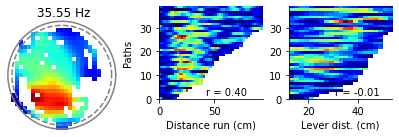

In [13]:
%%time 
col=3
row=1  
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure

cellId = "mn711-01022021-0107_117" # distance run dark
light = "dark"
pathType = "searchToLeverPath"

exampleOneNeuron(gs,cellId,pathType,light,showPath=False,matrixYAxisX=-0.25,behavioralVariables=["distance","targetDistance"])


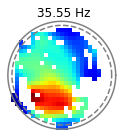

In [14]:
cellId = "mn711-01022021-0107_117" # distance run dark
col=1
row=1

setFigureFontSizes()
sizePerRow, sizePerCol = figurePanelDefaultSize()

fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure
ax =  fig.add_subplot(gs[0])
mapPlot(ax,cellId,mySearchMaps,searchIFR = searchIFR, pathType="searchToLeverPath",light="dark")

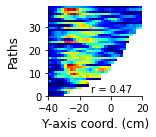

In [15]:
cellId = "mn711-01022021-0107_117" # distance run dark
col=1
row=1
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure
ax =  fig.add_subplot(gs[0])
plotIFRMatrix(ax,cellId,searchIFR, pathType="searchToLeverPath",light="dark",dv="y",yAxisX=-0.3)

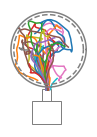

In [16]:
cellId = "mn711-01022021-0107_117" # distance run dark
col=1
row=1
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure

pathsPlot(gs,cellId,pathType="searchToLeverPath",light="dark")

## Find interesting examples

Now we need to find examples. 

1. Examples of neurons that are traditional place fields.
2. Examples of neurons that fire when the mouse is at a given distance from the lever.

Use a combination of trial matrix correlation (cor) and maxRateInHisto. Using y-coordinate and lever distance 

We can show that the fields with high firing rate in the y-coordinate are mainly at the beginning of the search. Fields with high firing rate in the lever distance are mainly at the end of the search.




### Search examples

In [17]:
minPeakRate=7.5

In [18]:
df = tmStats[(tmStats.pathType=="searchToLeverPath") & (tmStats.behavioralVariable.isin(["y","targetDistance"])) & (tmStats.light=="light")]
dfw = df.pivot(index=["cluId"],columns="behavioralVariable")
dfw = dfw.reset_index(drop=False)


active_SearchLight_Indices = dfw["meanRate"]["y"] > 2.5

print("Active neurons search-light: {} out of {}".format(np.sum(active_SearchLight_Indices),dfw.shape[0]))
placeCells_SearchLight_Indices = (dfw["maxRateInHisto"]["y"] > minPeakRate) & (dfw["cor"]["y"] > 0.2) & (dfw["cor"]["y"] > (dfw["cor"]["targetDistance"]+0.1)) & (dfw["maxRateInHisto"]["y"]> dfw["maxRateInHisto"]["targetDistance"])
leverCells_SearchLight_Indices = (dfw["maxRateInHisto"]["targetDistance"] > minPeakRate) & (dfw["cor"]["targetDistance"] > 0.15) & (dfw["cor"]["targetDistance"] > (dfw["cor"]["y"]+0.05))


placeCells_SearchLight = dfw[placeCells_SearchLight_Indices].cluId
leverCells_SearchLight = dfw[leverCells_SearchLight_Indices].cluId
placeCells_SearchLight.shape, leverCells_SearchLight.shape

Active neurons search-light: 200 out of 438


((24,), (11,))

In [19]:
df = tmStats[(tmStats.pathType=="searchToLeverPath") & (tmStats.behavioralVariable.isin(["y","targetDistance"])) & (tmStats.light=="dark")]
dfw = df.pivot(index=["cluId"],columns="behavioralVariable")
dfw = dfw.reset_index(drop=False)
dfw

active_SearchDark_Indices = dfw["meanRate"]["y"] > 2.5
print("Active neurons search-dark: {} out of {}".format(np.sum(active_SearchDark_Indices),dfw.shape[0]))
placeCells_SearchDark_Indices = (dfw["maxRateInHisto"]["y"] > minPeakRate) & (dfw["cor"]["y"] > 0.2) & (dfw["cor"]["y"] > (dfw["cor"]["targetDistance"]+0.1)) & (dfw["maxRateInHisto"]["y"]> dfw["maxRateInHisto"]["targetDistance"])
leverCells_SearchDark_Indices = (dfw["maxRateInHisto"]["targetDistance"] > minPeakRate) & (dfw["cor"]["targetDistance"] > 0.15) & (dfw["cor"]["targetDistance"] > (dfw["cor"]["y"]+0.05))

placeCells_SearchDark = dfw[placeCells_SearchDark_Indices].cluId
leverCells_SearchDark = dfw[leverCells_SearchDark_Indices].cluId
placeCells_SearchDark.shape, leverCells_SearchDark.shape

Active neurons search-dark: 190 out of 438


((43,), (0,))

TYY5622-17092021-0106_72
--- 0.000209808349609375 seconds ---
mn1173-06052021-0107_159
--- 0.05006885528564453 seconds ---
mn1173-06052021-0107_17
--- 0.09455490112304688 seconds ---
mn2739-17022021-0106_91
--- 0.1394639015197754 seconds ---
mn2739-17022021-0106_95
--- 0.19031238555908203 seconds ---
mn3246-10042021-0106_244
--- 0.26383113861083984 seconds ---
mn3246-10042021-0106_258
--- 0.31991147994995117 seconds ---
mn3246-10042021-0106_280
--- 0.4129469394683838 seconds ---
mn3246-10042021-0106_296
--- 0.5313591957092285 seconds ---
mn5618-12072021-0110_23
--- 0.6648645401000977 seconds ---


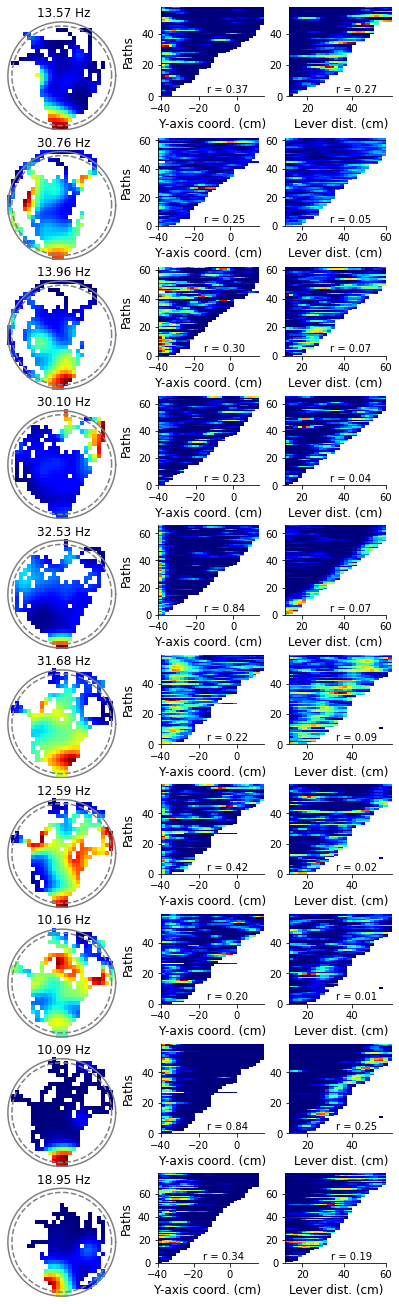

In [20]:
import time

cellIds = placeCells_SearchLight.iloc[0:10]
pathType="searchToLeverPath"
light="light"

col=3
row=cellIds.shape[0]
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(row, 1, figure=fig) # all our figure

start_time = time.time()

for i,cellId in enumerate(cellIds):
    print(cellId)
    print("--- %s seconds ---" % (time.time() - start_time))
    gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[i]) # get the first column
    exampleOneNeuron(gs1,cellId,pathType,light,showPath=False,behavioralVariables=["y","targetDistance"],matrixYAxisX=-0.25)
    
placeCells_SearchLight_Selection = ["mn1173-06052021-0107_17","mn3246-10042021-0106_296"]

TYY5622-17092021-0106_28
TYY5622-17092021-0106_47
mn1173-06052021-0107_116
mn1173-06052021-0107_47
mn1173-06052021-0107_54
mn1173-08052021-0107_44
mn2739-15022021-0105_154
mn2739-16022021-0106_162
mn2739-16022021-0106_166
mn2739-16022021-0106_168


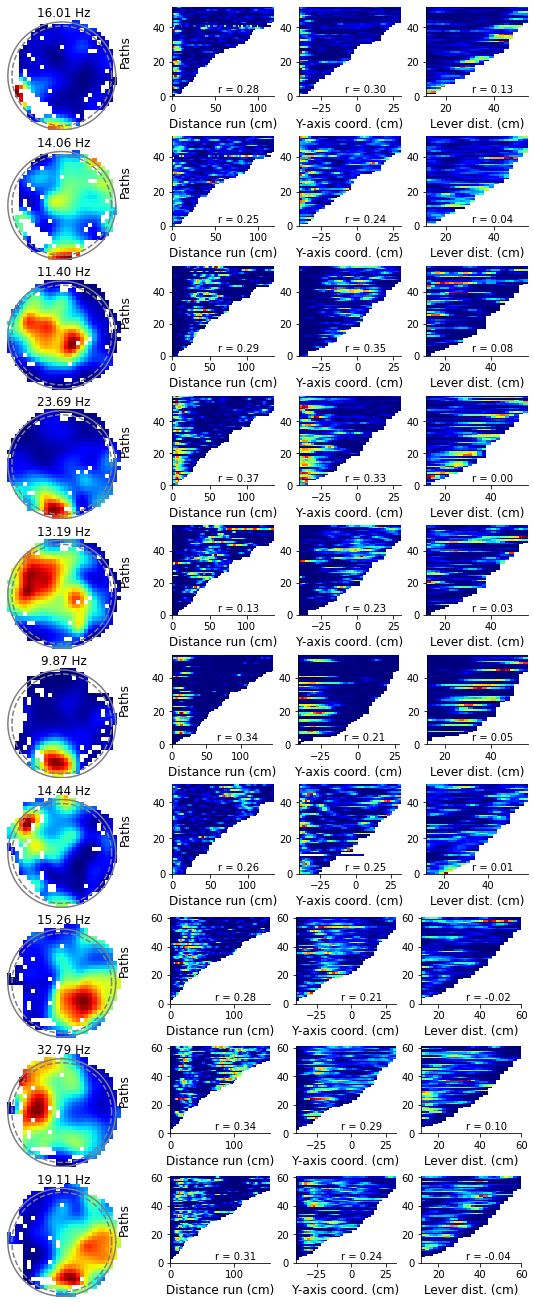

In [21]:
cellIds = placeCells_SearchDark.iloc[0:10]
pathType="searchToLeverPath"
light="dark"

col=4
row=cellIds.shape[0]
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(row, 1, figure=fig) # all our figure

for i,cellId in enumerate(cellIds):
    print(cellId)
    gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[i]) # get the first column
    exampleOneNeuron(gs1,cellId,pathType,light,showPath=False,behavioralVariables=["distance","y","targetDistance"])
    
placeCells_SearchDark_Selection = ["mn3246-10042021-0106_244","mn3246-10042021-0106_244","mn1173-06052021-0107_116"]

TYY9524-16082021-0106_32
mn1173-02052021-0107_125
mn1173-06052021-0107_26
mn1173-06052021-0107_95
mn1173-09052021-0108_103
mn1173-09052021-0108_4
mn2739-17022021-0106_15
mn3246-09042021-0106_4
mn3246-14042021-0106_224
mn711-04022021-0107_72


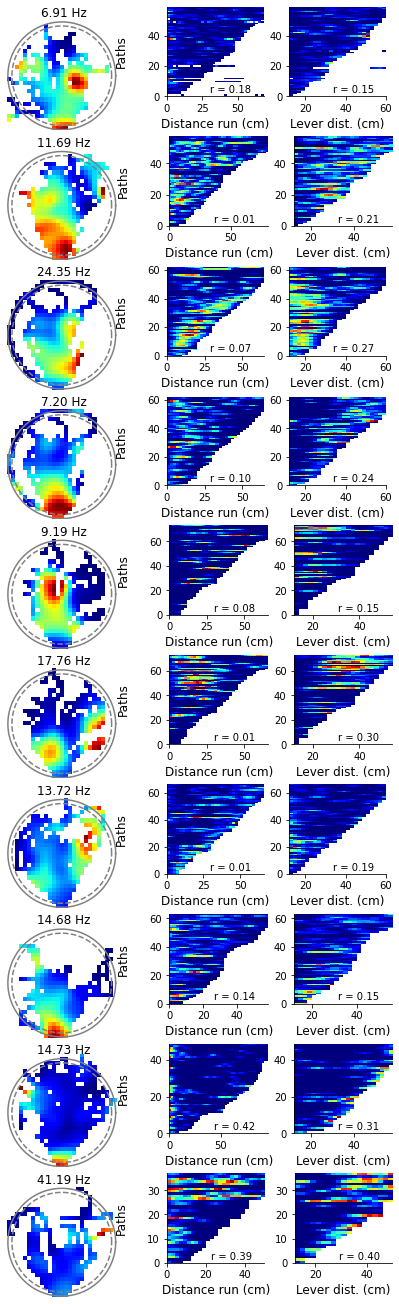

In [22]:
cellIds = leverCells_SearchLight.iloc[0:10]
pathType="searchToLeverPath"
light="light"

col=3
row=cellIds.shape[0]
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(row, 1, figure=fig) # all our figure

for i,cellId in enumerate(cellIds):
    print(cellId)
    gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[i]) # get the first column
    exampleOneNeuron(gs1,cellId,pathType,light,showPath=False,behavioralVariables=["distance","targetDistance"])
    
leverCells_SearchLight_Selection = ["mn1173-06052021-0107_26", "mn9686-26102021-0106_18"]

### Example homing

In [23]:
tmStats

,cluId,pathType,light,behavioralVariable,meanRate,maxRate,maxRateInHisto,maxRateInHistoLoc,stdAtPeak,rateSkew,Unnamed: 0,cor
0,mn5824-20112020-0107_92,searchToLeverPath,light,y,14.493111,103.996836,19.342487,5.0,24.534880,1.790586,0,0.013549
1,mn5824-20112020-0107_100,searchToLeverPath,light,y,0.733515,33.873356,1.085109,-17.0,4.188464,6.176024,1,-0.061833
2,mn5824-20112020-0107_114,searchToLeverPath,light,y,2.231578,58.287972,4.269781,-17.0,11.957404,4.506404,2,-0.017114
3,mn5824-20112020-0107_116,searchToLeverPath,light,y,0.052177,11.526491,0.157100,-33.0,1.313242,15.110985,3,-0.191541
4,mn5824-20112020-0107_118,searchToLeverPath,light,y,0.037693,6.938737,0.208342,-39.0,1.047773,12.785876,4,0.395661
...,...,...,...,...,...,...,...,...,...,...,...,...
7003,mn9686-01112021-0106_79,homingFromLeavingLeverToPeriphery,dark,targetDistance,0.479645,23.501198,0.847731,19.0,3.427651,5.985001,433,0.188285
7004,mn9686-01112021-0106_81,homingFromLeavingLeverToPeriphery,dark,targetDistance,0.003338,1.338997,0.018095,13.0,0.154600,20.558974,434,-0.163485
7005,mn9686-01112021-0106_197,homingFromLeavingLeverToPeriphery,dark,targetDistance,0.311009,45.921147,0.852285,19.0,5.807949,12.393413,435,0.814735
7006,mn9686-01112021-0106_242,homingFromLeavingLeverToPeriphery,dark,targetDistance,2.274357,26.863913,5.034981,37.0,7.257069,2.745090,436,0.195547


In [24]:
df = tmStats[(tmStats.pathType=="homingFromLeavingLeverToPeriphery") & (tmStats.behavioralVariable.isin(["y","targetDistance"])) & (tmStats.light=="light")]
dfw = df.pivot(index=["cluId"],columns="behavioralVariable")
dfw = dfw.reset_index(drop=False)

print("Active neurons homing-light: {} out of {}".format(np.sum(dfw["meanRate"]["y"] > 2.5),dfw.shape[0]))

placeCells_HomingLight = dfw[(dfw["maxRateInHisto"]["y"] > minPeakRate) & (dfw["cor"]["y"] > 0.4) & (dfw["cor"]["y"] > (dfw["cor"]["targetDistance"]+0.1)) & (dfw["maxRateInHisto"]["y"]> dfw["maxRateInHisto"]["targetDistance"])].cluId
leverCells_HomingLight = dfw[(dfw["maxRateInHisto"]["targetDistance"] > minPeakRate) & (dfw["cor"]["targetDistance"] > 0.10) & (dfw["cor"]["targetDistance"] > (dfw["cor"]["y"]+0.05))].cluId
placeCells_HomingLight.shape, leverCells_HomingLight.shape

Active neurons homing-light: 167 out of 438


((13,), (6,))

In [25]:
df = tmStats[(tmStats.pathType=="homingFromLeavingLeverToPeriphery") & (tmStats.behavioralVariable.isin(["y","targetDistance"])) & (tmStats.light=="dark")]
dfw = df.pivot(index=["cluId"],columns="behavioralVariable")
dfw = dfw.reset_index(drop=False)

print("Active neurons homing-dark: {} out of {}".format(np.sum(dfw["meanRate"]["y"] > 2.5),dfw.shape[0]))

placeCells_HomingDark = dfw[(dfw["maxRateInHisto"]["y"] > minPeakRate)].cluId #& (dfw["cor"]["y"] > 0.1) & (dfw["cor"]["y"] > (dfw["cor"]["targetDistance"]+0.1)) & (dfw["maxRateInHisto"]["y"]> dfw["maxRateInHisto"]["targetDistance"])].cluId
leverCells_HomingDark = dfw[(dfw["maxRateInHisto"]["targetDistance"] > minPeakRate) & (dfw["cor"]["targetDistance"] > 0.10) & (dfw["cor"]["targetDistance"] > (dfw["cor"]["y"]+0.05))].cluId
placeCells_HomingDark.shape, leverCells_HomingDark.shape

Active neurons homing-dark: 177 out of 438


((149,), (12,))

mn1173-06052021-0107_216
mn3246-12042021-0106_190
mn3246-12042021-0106_49
mn3246-14042021-0106_220
mn5618-12072021-0110_29
mn5618-12072021-0110_408
mn5618-12072021-0110_564
mn711-01022021-0107_83


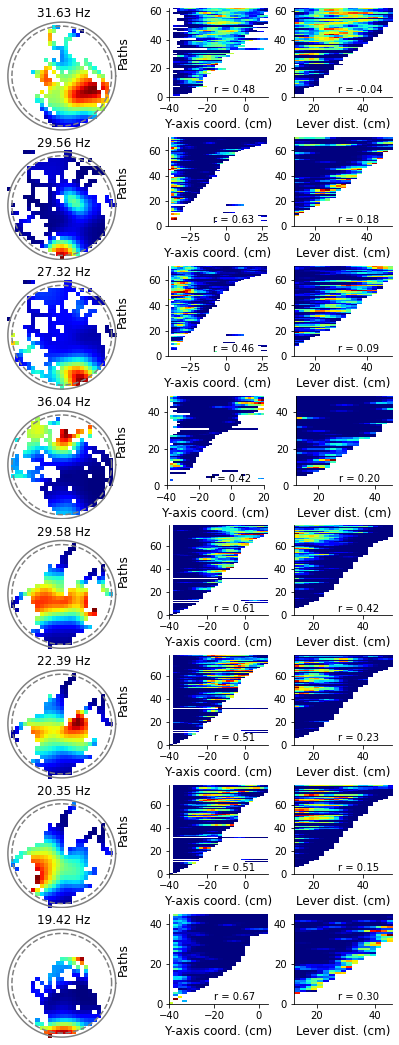

In [26]:
cellIds = placeCells_HomingLight.iloc[0:8]
pathType="homingFromLeavingLeverToPeriphery"
light="light"

col=3
row=cellIds.shape[0]
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(row, 1, figure=fig) # all our figure

for i,cellId in enumerate(cellIds):
    print(cellId)
    gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[i]) # get the first column
    exampleOneNeuron(gs1,cellId,pathType,light,showPath=False,behavioralVariables=["y","targetDistance"])
    
placeCells_HomingLight_Selection = []

mn1173-02052021-0107_33
mn1173-02052021-0107_62
mn1173-02052021-0107_96
mn1173-06052021-0107_101
mn1173-06052021-0107_103
mn1173-06052021-0107_114
mn1173-06052021-0107_120
mn1173-06052021-0107_159
mn1173-06052021-0107_17
mn1173-06052021-0107_42


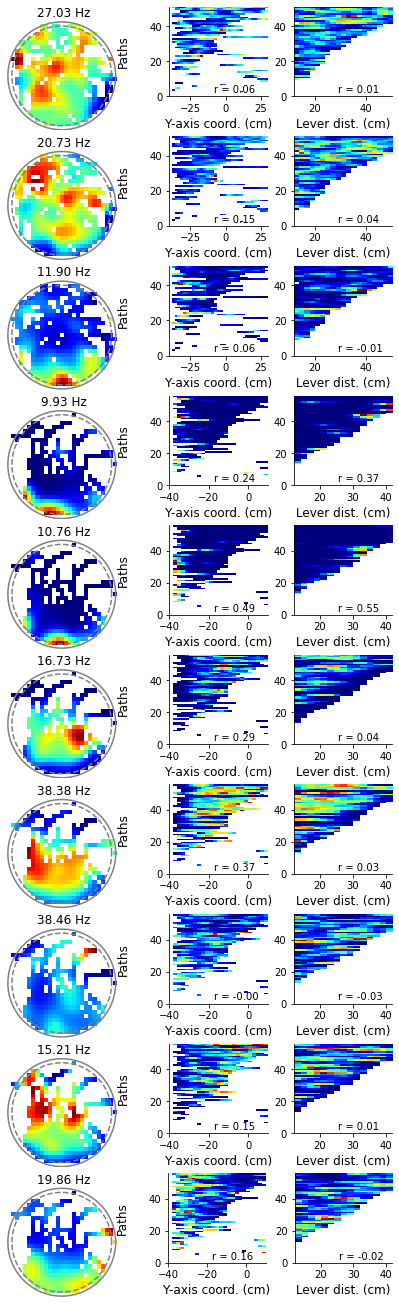

In [27]:
cellIds = placeCells_HomingDark.iloc[10:20]
pathType="homingFromLeavingLeverToPeriphery"
light="dark"

col=3
row=cellIds.shape[0]
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(row, 1, figure=fig) # all our figure

for i,cellId in enumerate(cellIds):
    print(cellId)
    gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[i]) # get the first column
    exampleOneNeuron(gs1,cellId,pathType,light,showPath=False,behavioralVariables=["y","targetDistance"])
    
placeCells_HomingDark_Selection = []

TYY5622-17092021-0106_41
TYY5622-17092021-0106_45
TYY5622-19092021-0106_27
mn1173-06052021-0107_120
mn3246-09042021-0106_196
mn9686-29102021-0106_220


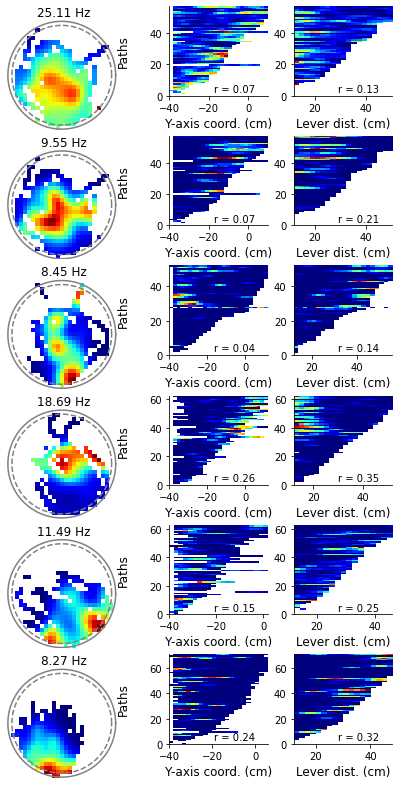

In [28]:
cellIds = leverCells_HomingLight.iloc[0:10]
pathType="homingFromLeavingLeverToPeriphery"
light="light"

col=3
row=cellIds.shape[0]
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(row, 1, figure=fig) # all our figure

for i,cellId in enumerate(cellIds):
    print(cellId)
    gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[i]) # get the first column
    exampleOneNeuron(gs1,cellId,pathType,light,showPath=False,behavioralVariables=["y","targetDistance"])
    
leverCells_HomingLight_Selection = []

TYY5622-20092021-0106_39
mn2739-17022021-0106_53
mn3246-09042021-0106_196
mn5824-02122020-0106_168
mn5824-24112020-0107_114
mn711-01022021-0107_69
mn711-02022021-0108_109
mn711-31012021-0107_44
mn711-31012021-0107_50
mn9686-27102021-0106_59


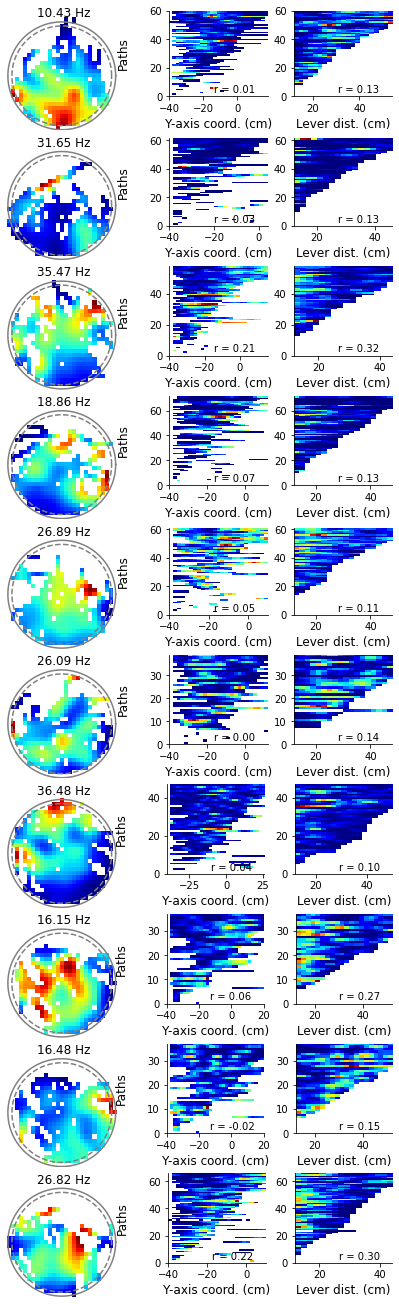

In [29]:
cellIds = leverCells_HomingDark.iloc[:10]
pathType="homingFromLeavingLeverToPeriphery"
light="dark"

col=3
row=cellIds.shape[0]
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(row, 1, figure=fig) # all our figure

for i,cellId in enumerate(cellIds):
    print(cellId)
    gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[i]) # get the first column
    exampleOneNeuron(gs1,cellId,pathType,light,showPath=False,behavioralVariables=["y","targetDistance"])
    
leverCells_HomingDark_Selection = []

And now we can plot our examples. 

We will only show examples for the 4 conditions. We want to give the reader an idea of the firing fields as the mouse moves around on the arena.

In [30]:
def plotExamplesFewCells(gs,cellIds,pathType,light):
    """
    Plot the 2d firing rate map and the trial matrices
    """
    
    gsPerCells = gridspec.GridSpecFromSubplotSpec(len(cellIds), 1, subplot_spec=gs[0]) 
    
    for i,cellId in enumerate(cellIds):
        gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPerCells[i]) # get the first column
        exampleOneNeuron(gs1,cellId,pathType,light,showPath=False,behavioralVariables=["y","targetDistance"],matrixYAxisX=-0.25)

def plotExamplesFewCellsWithTitle(gs,cellIds,pathType,light,title="myTitle"):
    """
    Wrapper to plot example of neurons with a title at the top
    """
    gsTwo = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0],height_ratios=[0.05,1])
    
    ax = fig.add_subplot(gsTwo[0])
    ax.text(0.5,0.5,title,fontsize=16,ha='center', va='center',transform=ax.transAxes)
    ax.axis('off')
    
    gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsTwo[1])
    plotExamplesFewCells(gs1,cellIds,pathType,light)
    

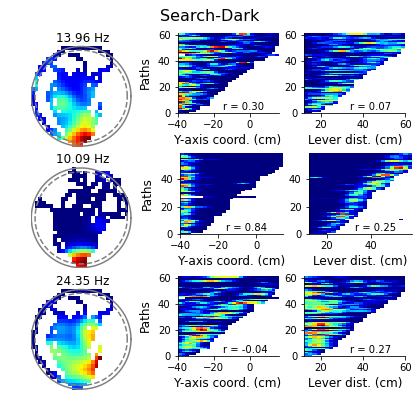

In [31]:
cellIds = [ "mn1173-06052021-0107_17","mn3246-10042021-0106_296",  "mn1173-06052021-0107_26"]
pathType="searchToLeverPath"
light="light"
col=3
row=3

fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure
plotExamplesFewCellsWithTitle(gs,cellIds,pathType,light,title="Search-Dark")


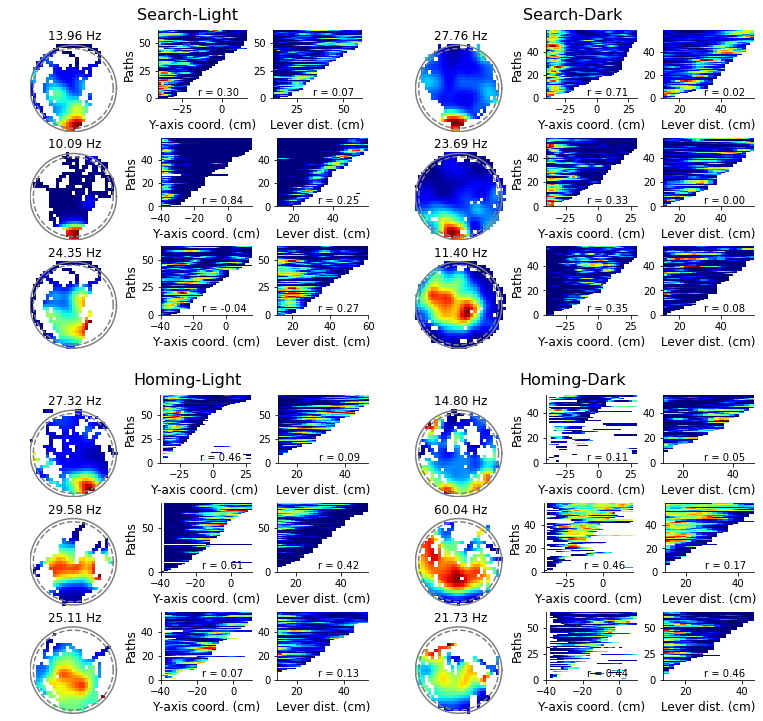

In [32]:
def plotExamplesFourConditions(gs):
    myDict={"Search-Light":{"cellIds": [ "mn1173-06052021-0107_17","mn3246-10042021-0106_296",  "mn1173-06052021-0107_26"],
                         "pathType": "searchToLeverPath",
                         "light": "light"},
           "Search-Dark":{"cellIds": ["mn3246-10042021-0106_244","mn1173-06052021-0107_47","mn1173-06052021-0107_116"],
                         "pathType": "searchToLeverPath",
                         "light": "dark"},
           "Homing-Light":{"cellIds": [ "mn3246-12042021-0106_49","mn5618-12072021-0110_29", "TYY5622-17092021-0106_41"],
                         "pathType": "homingFromLeavingLeverToPeriphery",
                         "light": "light"},
           "Homing-Dark":{"cellIds": ["mn1173-08052021-0107_96","mn3246-10042021-0106_236","mn9686-27102021-0106_36"],
                         "pathType": "homingFromLeavingLeverToPeriphery",
                         "light": "dark"},
          }
    
    
    gsFour = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[0],width_ratios=[1,0.05,1],height_ratios=[1,0.05,1])
    for i, cond in enumerate(myDict.keys()):
        x = int(i/2)
        y = int(i%2)
        if x > 0:
            x = x+1
        if y > 0:
            y = y+1
        gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsFour[x,y])
        
        plotExamplesFewCellsWithTitle(gs1,
                                      myDict[cond]["cellIds"],
                                      myDict[cond]["pathType"],
                                      myDict[cond]["light"],
                                      title=cond)

 
col=5.5
row=5.5
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure
plotExamplesFourConditions(gs)
    
    

In [33]:
def plotExampleCellPanel(gs,matrixYAxisX=-0.4):

    cellIds = {"sl": "mn711-01022021-0107_75",
               "hl": "mn9686-28102021-0107_180",
                "sd": "mn3246-10042021-0106_244",
                "hd": "mn5618-12072021-0110_31"}

     # Add a title
    gsTitle = gridspec.GridSpecFromSubplotSpec(8, 1, subplot_spec=gs[0],height_ratios=[0.2,1]*4)
    ax = fig.add_subplot(gsTitle[0])
    ax.text(0.5,0.5,"Search - Light",fontsize=16,ha='center', va='center',transform=ax.transAxes)
    ax.axis('off')
    ax = fig.add_subplot(gsTitle[2])
    ax.text(0.5,0.5,"Search - Dark",fontsize=16,transform=ax.transAxes,ha='center', va='center')
    ax.axis('off')
    ax = fig.add_subplot(gsTitle[4])
    ax.text(0.5,0.5,"Homing - Light",fontsize=16,transform=ax.transAxes,ha='center', va='center')
    ax.axis('off')
    ax = fig.add_subplot(gsTitle[6])
    ax.text(0.5,0.5,"Homing - Dark",fontsize=16,transform=ax.transAxes,ha='center', va='center')
    ax.axis('off')
    
    
    gsPlots = gridspec.GridSpecFromSubplotSpec(8, 1, subplot_spec=gs[0],height_ratios=[0.2,1]*4)


    for i, (light,pathType) in enumerate(zip(["light","dark","light","dark"],["searchToLeverPath","searchToLeverPath","homingFromLeavingLeverToPeriphery","homingFromLeavingLeverToPeriphery"])):
        cellId = cellIds[pathType[0]+light[0]]
        gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[i*2+1]) 
        exampleOneNeuron(gs1,cellId,pathType,light,showPath=False,matrixYAxisX=matrixYAxisX)

        

#col=5
#row=4
  
#fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
#gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure
#plotExampleCellPanel(gs,matrixYAxisX=-0.2)

#ax = fig.add_subplot(gs[0])
#ax.text(0.0,1, 'a', style='normal',fontsize=15, weight="bold")
#ax.axis("off")
#plt.show()

# Location of y-coord. and lever distance fields

We often see sharp firing fields as the animal enters the arena. Fields in the center of the arena are wider.


Active neurons homing-dark: 197 out of 438


0

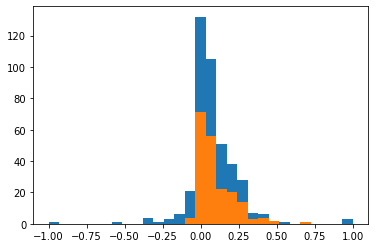

In [34]:
activeThreshold=2.0
peakFieldThreshold=10

df = tmStats[(tmStats.pathType=="homingFromLeavingLeverToPeriphery") & (tmStats.behavioralVariable.isin(["y","targetDistance"])) & (tmStats.light=="dark")]
dfw = df.pivot(index=["cluId"],columns="behavioralVariable")
df = dfw.reset_index(drop=False)

active_Indices = (df["meanRate"]["y"] > activeThreshold)

plt.hist(df["cor"]["y"],bins=np.linspace(-1,1,30))
plt.hist(df["cor"]["y"][active_Indices],bins=np.linspace(-1,1,30))

print("Active neurons homing-dark: {} out of {}".format(np.sum(active_Indices),dfw.shape[0]))

np.sum(np.isnan(df["maxRateInHisto"]["y"]))


Proportion of neurons that are active during the 4 types of navPath considered.

In [35]:
count = 0
chiMatActive = np.empty((4,2))
chiMatField = np.empty((4,2))
for pathType in ["searchToLeverPath","homingFromLeavingLeverToPeriphery"]:
    for light in ["light","dark"]:
        df = tmStats[(tmStats.pathType==pathType) & (tmStats.behavioralVariable.isin(["y"])) & (tmStats.light==light)]
        dfw = df.pivot(index=["cluId"],columns="behavioralVariable")
        df = dfw.reset_index(drop=False)
        
        neurons = len(df["meanRate"]["y"])
        active_Indices = (df["meanRate"]["y"] > activeThreshold)
        inactive_Indices = (df["meanRate"]["y"] <= activeThreshold)
        activeWithField_Indices = active_Indices & (df["maxRateInHisto"]["y"] > peakFieldThreshold)
        activeWithoutField_Indices = active_Indices & (df["maxRateInHisto"]["y"] <= peakFieldThreshold)
        
        print(pathType,light,"Number of neurons:",neurons, "Active neurons:",np.sum(active_Indices),
              "Prop. active:",np.sum(active_Indices)/neurons,"Neurons with fields:",np.sum(activeWithField_Indices), 
              "Neurons without fields:",np.sum(activeWithoutField_Indices))
        chiMatActive[count,0]=np.sum(active_Indices)
        chiMatActive[count,1]=np.sum(inactive_Indices)
        
        chiMatField[count,0]=np.sum(activeWithField_Indices)
        chiMatField[count,1]=np.sum(activeWithoutField_Indices)
        
        
        count=count+1
        
chiMatActive, chiMatField

searchToLeverPath light Number of neurons: 438 Active neurons: 226 Prop. active: 0.5159817351598174 Neurons with fields: 104 Neurons without fields: 122
searchToLeverPath dark Number of neurons: 438 Active neurons: 212 Prop. active: 0.4840182648401826 Neurons with fields: 94 Neurons without fields: 118
homingFromLeavingLeverToPeriphery light Number of neurons: 438 Active neurons: 191 Prop. active: 0.4360730593607306 Neurons with fields: 109 Neurons without fields: 82
homingFromLeavingLeverToPeriphery dark Number of neurons: 438 Active neurons: 197 Prop. active: 0.4497716894977169 Neurons with fields: 112 Neurons without fields: 85


(array([[226., 212.],
        [212., 226.],
        [191., 247.],
        [197., 241.]]),
 array([[104., 122.],
        [ 94., 118.],
        [109.,  82.],
        [112.,  85.]]))

Chi-square test to know whether the number of active cells differs across condition.

In [36]:
from scipy.stats import chisquare
chisquare(chiMatActive[:,0])

Power_divergenceResult(statistic=3.588377723970944, pvalue=0.309479420429741)

In [37]:
chisquare(chiMatField[:,0])

Power_divergenceResult(statistic=1.7828162291169452, pvalue=0.6186814372456457)

### Distribution of trial matrix correlations

In [38]:
tmStats

,cluId,pathType,light,behavioralVariable,meanRate,maxRate,maxRateInHisto,maxRateInHistoLoc,stdAtPeak,rateSkew,Unnamed: 0,cor
0,mn5824-20112020-0107_92,searchToLeverPath,light,y,14.493111,103.996836,19.342487,5.0,24.534880,1.790586,0,0.013549
1,mn5824-20112020-0107_100,searchToLeverPath,light,y,0.733515,33.873356,1.085109,-17.0,4.188464,6.176024,1,-0.061833
2,mn5824-20112020-0107_114,searchToLeverPath,light,y,2.231578,58.287972,4.269781,-17.0,11.957404,4.506404,2,-0.017114
3,mn5824-20112020-0107_116,searchToLeverPath,light,y,0.052177,11.526491,0.157100,-33.0,1.313242,15.110985,3,-0.191541
4,mn5824-20112020-0107_118,searchToLeverPath,light,y,0.037693,6.938737,0.208342,-39.0,1.047773,12.785876,4,0.395661
...,...,...,...,...,...,...,...,...,...,...,...,...
7003,mn9686-01112021-0106_79,homingFromLeavingLeverToPeriphery,dark,targetDistance,0.479645,23.501198,0.847731,19.0,3.427651,5.985001,433,0.188285
7004,mn9686-01112021-0106_81,homingFromLeavingLeverToPeriphery,dark,targetDistance,0.003338,1.338997,0.018095,13.0,0.154600,20.558974,434,-0.163485
7005,mn9686-01112021-0106_197,homingFromLeavingLeverToPeriphery,dark,targetDistance,0.311009,45.921147,0.852285,19.0,5.807949,12.393413,435,0.814735
7006,mn9686-01112021-0106_242,homingFromLeavingLeverToPeriphery,dark,targetDistance,2.274357,26.863913,5.034981,37.0,7.257069,2.745090,436,0.195547


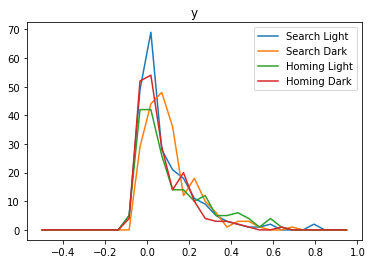

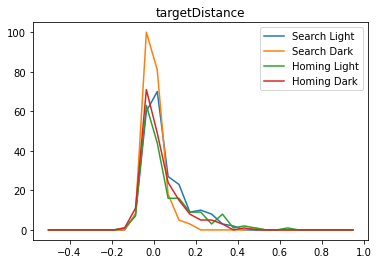

In [39]:
minRate=2.0

myDict={"searchToLeverPath":"Search",
        "homingFromLeavingLeverToPeriphery": "Homing"}

for behavioralVariable in ["y","targetDistance"]:
    for pathType in ["searchToLeverPath","homingFromLeavingLeverToPeriphery"]:
        for light in ["light","dark"]:
            df = tmStats[(tmStats.pathType==pathType) & (tmStats.behavioralVariable==behavioralVariable) & (tmStats.light==light)& (tmStats.meanRate>minRate)]
            n, x = np.histogram(df.cor,bins=np.linspace(-0.5,1,30))
            plt.plot(x[:-1], n,label = "{} {}".format(myDict[pathType],light.capitalize()))
    plt.title(behavioralVariable)
    plt.legend()
    plt.show()

In [40]:
def plotTrialMatrixInternalCorrelation2(gs,df,title="Hey",legend=False):

   
    dfSel = df[df.pathType==pathType]
    myDict={"ylabel":{"cor":"Trial matrix corr."},
           "yMax":{"cor":0.2},
            "xTicksValues": ["Search", "Homing"]
           }
    ax = fig.add_subplot(gs[0])

    sns.barplot(hue = "light", y = "cor", x = "pathType", data = df, hue_order=["dark","light"],palette=darkLightColors())
    ax.set_ylabel(myDict["ylabel"]["cor"])
    ax.set_xlabel("")
    ax.set_ylim(0,myDict["yMax"]["cor"])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticklabels(myDict["xTicksValues"], rotation= 0,ha = "center")
    if legend:
        ax.legend(loc=0, frameon=False)
    else:
        ax.legend([],[], frameon=False)
    ax.set_title(title)
    
def plotTrialMatrixCorrelationTwoVariables(gs,df,minRate=2.0):
    
    myTitleDict = {"y": "Y-coordinate",
                  "targetDistance": "Lever distance"}
    gsPlots = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0])
    for i,behavioralVariable in enumerate(["y","targetDistance"]):
        
        
        df1 = df[(df.behavioralVariable==behavioralVariable) & (df.meanRate>minRate)]
        gsOnePlot = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[i])
        plotTrialMatrixInternalCorrelation2(gsOnePlot,df=df1,title=myTitleDict[behavioralVariable])

        
    


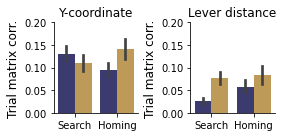

In [41]:
col=2
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure
plotTrialMatrixCorrelationTwoVariables(gs,df=tmStats)

In [42]:
def plotInfoScore(gs,df,title="Hey",legend=False):

   
    dfSel = df[df.pathType==pathType]
    myDict={"ylabel":{"info":"Info score"},
           "yMax":{"info":0.3},
            "xTicksValues": ["Search", "Homing"]
           }
    ax = fig.add_subplot(gs[0])

    sns.barplot(hue = "light", y = "info", x = "pathType", data = df, hue_order=["dark","light"],palette=darkLightColors())
    ax.set_ylabel(myDict["ylabel"]["info"])
    ax.set_xlabel("")
    ax.set_ylim(0,myDict["yMax"]["info"])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticklabels(myDict["xTicksValues"], rotation= 0,ha = "center")
    if legend:
        ax.legend(loc=0, frameon=False)
    else:
        ax.legend([],[], frameon=False)
    ax.set_title(title)
    
def plotInfoScoreTwoVariables(gs,df,minRate=2.0):
    
    myTitleDict = {"y": "Y-axis coordinate",
                  "targetDistance": "Lever distance"}
    gsPlots = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0])
    for i,behavioralVariable in enumerate(["y","targetDistance"]):
        
        df1 = df[(df.behavioralVariable==behavioralVariable) & (df.meanRate>minRate)]
        gsOnePlot = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[i])
        plotInfoScore(gsOnePlot,df=df1,title=myTitleDict[behavioralVariable])


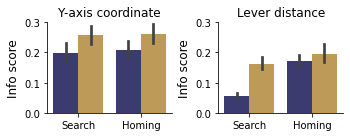

In [43]:
col=2.5
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure
plotInfoScoreTwoVariables(gs,df=oneDStats)

Get one row of stats 

In [44]:
def statRow(gs):
    gsPlots = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0])
    
    gsPlotOne = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[0])
    plotTrialMatrixCorrelationTwoVariables(gsPlotOne,df=tmStats)
    gsPlotTwo = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[1])
    plotInfoScoreTwoVariables(gsPlotTwo,df=oneDStats)

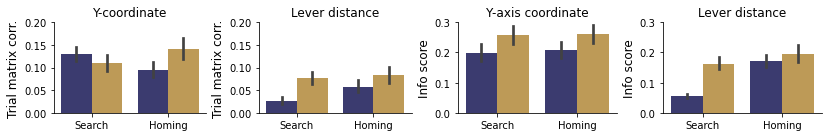

In [45]:
col=6
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gsStats = gridspec.GridSpec(1, 1, figure=fig) # all our figure
statRow(gsStats)

We need stats to go with the barplots.

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

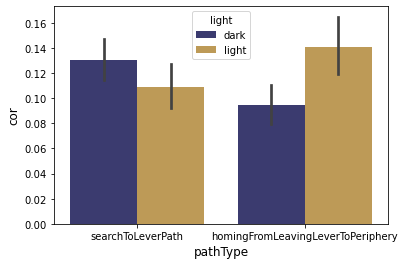

                         sum_sq     df          F    PR(>F)
C(light)               0.020750    1.0   1.104690  0.293548
C(pathType)            0.000838    1.0   0.044608  0.832780
C(light):C(pathType)   0.233513    1.0  12.431567  0.000445
Residual              15.440325  822.0        NaN       NaN
Simple main effects
Searchtoleverpath
            sum_sq     df         F    PR(>F)
C(light)  0.051250    1.0  2.892108  0.089727
Residual  7.726213  436.0       NaN       NaN
Homingfromleavinglevertoperiphery
            sum_sq     df          F    PR(>F)
C(light)  0.203013    1.0  10.158395  0.001553
Residual  7.714112  386.0        NaN       NaN

Simple main effects 2
Light
               sum_sq     df         F    PR(>F)
C(pathType)  0.102394    1.0  4.426387  0.035988
Residual     9.600035  415.0       NaN       NaN
Dark
               sum_sq     df         F    PR(>F)
C(pathType)  0.131957    1.0  9.195841  0.002581
Residual     5.840290  407.0       NaN       NaN


In [47]:
behavioralVariable="y"
minRate=2.0
df = tmStats

df = df[(df.behavioralVariable==behavioralVariable) & (df.meanRate>minRate)]
sns.barplot(hue = "light", y = "cor", x = "pathType", data = df,hue_order=["dark","light"],palette=darkLightColors())
plt.show()
#perform two-way ANOVA
model = ols('cor ~ C(light) + C(pathType) + C(light):C(pathType)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

# if significant interaction
print("Simple main effects")
for level  in df["pathType"].unique():
    print(level.capitalize())
    dfSel = df[df["pathType"] == level]
    model = ols('cor ~ C(light)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))
    
print()
# if significant interaction
print("Simple main effects 2")
for level  in df["light"].unique():
    print(level.capitalize())
    dfSel = df[df["light"] == level]
    model = ols('cor ~ C(pathType)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))

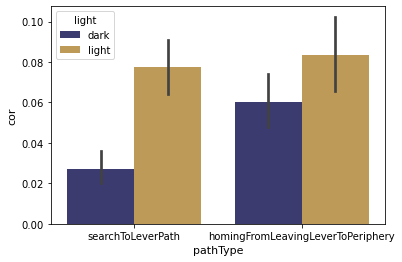

                        sum_sq     df          F        PR(>F)
C(light)              0.287891    1.0  31.739513  2.436526e-08
C(pathType)           0.078560    1.0   8.661072  3.344085e-03
C(light):C(pathType)  0.037139    1.0   4.094562  4.335092e-02
Residual              7.310755  806.0        NaN           NaN

Simple main effects
Searchtoleverpath
            sum_sq     df          F        PR(>F)
C(light)  0.275266    1.0  43.009954  1.551356e-10
Residual  2.777623  434.0        NaN           NaN
Homingfromleavinglevertoperiphery
            sum_sq     df         F    PR(>F)
C(light)  0.049764    1.0  4.083755  0.044013
Residual  4.533132  372.0       NaN       NaN

Simple main effects 2
Light
               sum_sq     df         F    PR(>F)
C(pathType)  0.003569    1.0  0.289053  0.591128
Residual     4.925986  399.0       NaN       NaN
Dark
               sum_sq     df          F    PR(>F)
C(pathType)  0.112130    1.0  19.136879  0.000015
Residual     2.384769  407.0        NaN 

In [51]:
behavioralVariable="targetDistance"
minRate=2.0
df = tmStats
df = df[(df.behavioralVariable==behavioralVariable) & (df.meanRate>minRate)]
sns.barplot(hue = "light", y = "cor", x = "pathType", data = df,hue_order=["dark","light"],palette=darkLightColors())
plt.show()
#perform two-way ANOVA
model = ols('cor ~ C(light) + C(pathType) + C(light):C(pathType)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))
print()
# if significant interaction
print("Simple main effects")
for level  in df["pathType"].unique():
    print(level.capitalize())
    dfSel = df[df["pathType"] == level]
    model = ols('cor ~ C(light)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))
    
    
    
print()
# if significant interaction
print("Simple main effects 2")
for level  in df["light"].unique():
    print(level.capitalize())
    dfSel = df[df["light"] == level]
    model = ols('cor ~ C(pathType)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))

In [65]:
oneDStats

,session,cluId,light,behavioralVariable,meanRate,info,minX,maxX,peakRate,peakLoc,pathType
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,distance,14.761577,0.014007,0.0,52.433,14.784263,11,searchToLeverPath
5,mn5824-20112020-0107,mn5824-20112020-0107_100,light,distance,0.740231,0.206911,0.0,52.433,0.831569,6,searchToLeverPath
7,mn5824-20112020-0107,mn5824-20112020-0107_114,light,distance,1.652608,0.157766,0.0,52.433,2.821333,7,searchToLeverPath
8,mn5824-20112020-0107,mn5824-20112020-0107_116,light,distance,0.094681,1.572155,0.0,52.433,0.258257,10,searchToLeverPath
9,mn5824-20112020-0107,mn5824-20112020-0107_118,light,distance,0.068859,0.840414,0.0,52.433,0.091245,0,searchToLeverPath
...,...,...,...,...,...,...,...,...,...,...,...
37,mn9686-01112021-0106,mn9686-01112021-0106_79,dark,y,0.898588,1.309616,-35.0,-1.195,0.929857,3,homingFromLeavingLeverToPeriphery
38,mn9686-01112021-0106,mn9686-01112021-0106_81,dark,y,0.112323,NaN,-35.0,-1.195,0.000000,0,homingFromLeavingLeverToPeriphery
49,mn9686-01112021-0106,mn9686-01112021-0106_197,dark,y,1.444159,1.529129,-35.0,-1.195,1.145301,14,homingFromLeavingLeverToPeriphery
60,mn9686-01112021-0106,mn9686-01112021-0106_242,dark,y,3.690629,0.209501,-35.0,-1.195,4.505524,11,homingFromLeavingLeverToPeriphery


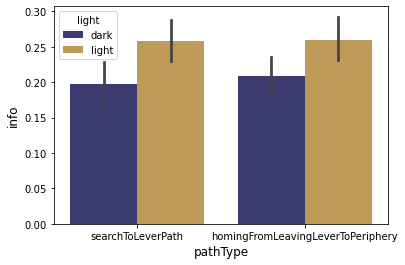

                         sum_sq     df          F    PR(>F)
C(light)               0.705411    1.0  14.274878  0.000169
C(pathType)            0.008985    1.0   0.181820  0.669918
C(light):C(pathType)   0.004940    1.0   0.099973  0.751937
Residual              43.535697  881.0        NaN       NaN
Simple main effects
Searchtoleverpath
             sum_sq     df         F    PR(>F)
C(light)   0.435088    1.0  8.199537  0.004379
Residual  24.780215  467.0       NaN       NaN
Homingfromleavinglevertoperiphery
             sum_sq     df        F    PR(>F)
C(light)   0.275263    1.0  6.07602  0.014108
Residual  18.755482  414.0      NaN       NaN


In [48]:
behavioralVariable="y"
minRate=2.0
df = oneDStats

df = df[(df.behavioralVariable==behavioralVariable) & (df.meanRate>minRate)]
sns.barplot(hue = "light", y = "info", x = "pathType", data = df,hue_order=["dark","light"],palette=darkLightColors())
plt.show()
#perform two-way ANOVA
model = ols('info ~ C(light) + C(pathType) + C(light):C(pathType)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

# if significant interaction
print("Simple main effects")
for level  in df["pathType"].unique():
    print(level.capitalize())
    dfSel = df[df["pathType"] == level]
    model = ols('info ~ C(light)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))

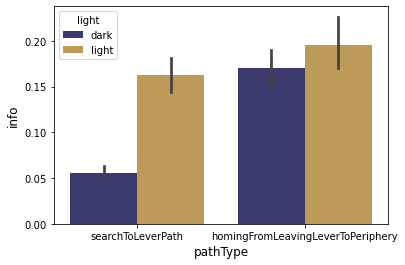

                         sum_sq     df          F        PR(>F)
C(light)               1.048235    1.0  46.406075  1.779403e-11
C(pathType)            1.209953    1.0  53.565416  5.633257e-13
C(light):C(pathType)   0.366779    1.0  16.237549  6.070232e-05
Residual              19.900309  881.0        NaN           NaN
Simple main effects
Searchtoleverpath
            sum_sq     df          F        PR(>F)
C(light)  1.346866    1.0  95.867349  1.029661e-20
Residual  6.561008  467.0        NaN           NaN
Homingfromleavinglevertoperiphery
             sum_sq     df         F    PR(>F)
C(light)   0.068148    1.0  2.115055  0.146615
Residual  13.339301  414.0       NaN       NaN

Simple main effects 2
Light
                sum_sq     df         F    PR(>F)
C(pathType)   0.121243    1.0  3.669916  0.056049
Residual     14.569359  441.0       NaN       NaN
Dark
               sum_sq     df           F        PR(>F)
C(pathType)  1.455488    1.0  120.131463  7.023473e-25
Residual     5.33095

In [50]:
behavioralVariable="targetDistance"
minRate=2.0
df = oneDStats

df = df[(df.behavioralVariable==behavioralVariable) & (df.meanRate>minRate)]
sns.barplot(hue = "light", y = "info", x = "pathType", data = df,hue_order=["dark","light"],palette=darkLightColors())
plt.show()
#perform two-way ANOVA
model = ols('info ~ C(light) + C(pathType) + C(light):C(pathType)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

# if significant interaction
print("Simple main effects")
for level  in df["pathType"].unique():
    print(level.capitalize())
    dfSel = df[df["pathType"] == level]
    model = ols('info ~ C(light)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))
    
    
   
print()
# if significant interaction
print("Simple main effects 2")
for level  in df["light"].unique():
    print(level.capitalize())
    dfSel = df[df["light"] == level]
    model = ols('info ~ C(pathType)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))

Stack the examples and stats

Examples
Stats


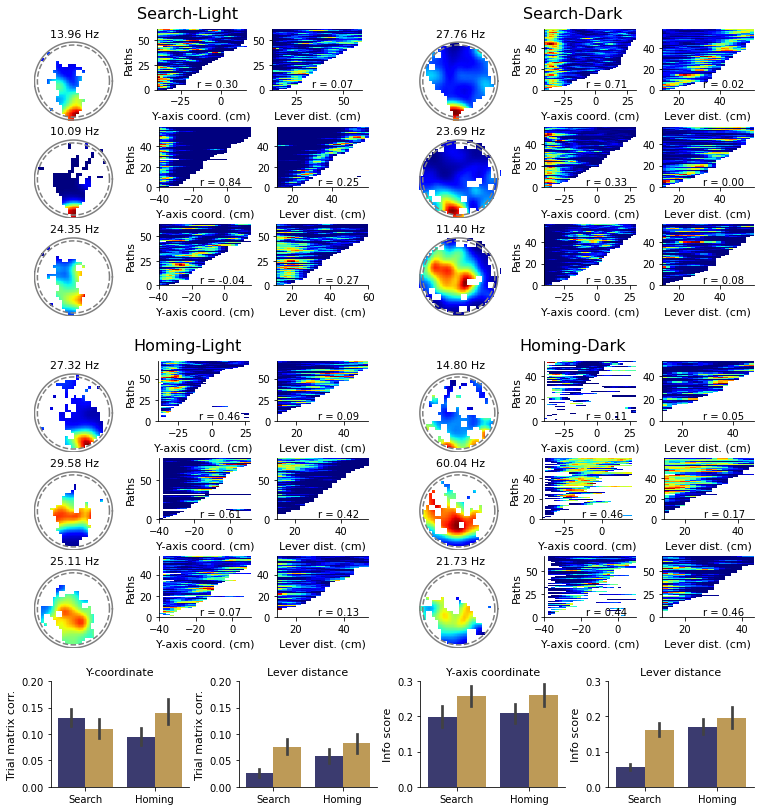

In [48]:
col=5.5
row=6.2
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gsPlots = gridspec.GridSpec(3, 1, figure=fig,height_ratios=[5,0.1,1.1]) # all our figure

print("Examples")
gsOnePlotx = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[0])
plotExamplesFourConditions(gsOnePlotx)
    
print("Stats")
gsOnePloty = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[2])
statRow(gsOnePloty)

### Cell selection for analysis

We can get the mean firing rate in a particular condition using oneDStats data frame. This comes from the 1D maps in which long trials were excluded (90 percentile and above). This might affect the results but I don't think by much.

If a neuron has a firing rate above 3 Hz, it is included in the analysis.

In [49]:
oneDSearchStatsSel["pathType"] = "searchToLeverPath"
oneDHomingStatsSel["pathType"] = "homingFromLeavingLeverToPeriphery"
oneDStats  = pd.concat([oneDSearchStatsSel,oneDHomingStatsSel])
oneDStats
df = oneDStats
df

,session,cluId,light,behavioralVariable,meanRate,info,minX,maxX,peakRate,peakLoc,pathType
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,distance,14.761577,0.014007,0.0,52.433,14.784263,11,searchToLeverPath
5,mn5824-20112020-0107,mn5824-20112020-0107_100,light,distance,0.740231,0.206911,0.0,52.433,0.831569,6,searchToLeverPath
7,mn5824-20112020-0107,mn5824-20112020-0107_114,light,distance,1.652608,0.157766,0.0,52.433,2.821333,7,searchToLeverPath
8,mn5824-20112020-0107,mn5824-20112020-0107_116,light,distance,0.094681,1.572155,0.0,52.433,0.258257,10,searchToLeverPath
9,mn5824-20112020-0107,mn5824-20112020-0107_118,light,distance,0.068859,0.840414,0.0,52.433,0.091245,0,searchToLeverPath
...,...,...,...,...,...,...,...,...,...,...,...
37,mn9686-01112021-0106,mn9686-01112021-0106_79,dark,y,0.898588,1.309616,-35.0,-1.195,0.929857,3,homingFromLeavingLeverToPeriphery
38,mn9686-01112021-0106,mn9686-01112021-0106_81,dark,y,0.112323,NaN,-35.0,-1.195,0.000000,0,homingFromLeavingLeverToPeriphery
49,mn9686-01112021-0106,mn9686-01112021-0106_197,dark,y,1.444159,1.529129,-35.0,-1.195,1.145301,14,homingFromLeavingLeverToPeriphery
60,mn9686-01112021-0106,mn9686-01112021-0106_242,dark,y,3.690629,0.209501,-35.0,-1.195,4.505524,11,homingFromLeavingLeverToPeriphery


In [50]:
rateThreshold=2.5
cellSelection={}
for i, (light,pathType) in enumerate(zip(["light","light","dark","dark"],["searchToLeverPath","homingFromLeavingLeverToPeriphery","searchToLeverPath","homingFromLeavingLeverToPeriphery"])):
    cellSelection[pathType+"-"+light] = df[(df["light"]==light)&(df["pathType"]==pathType)&(df["behavioralVariable"]=="distance")&(df["meanRate"]>rateThreshold)].cluId

### Get trial matrix internal correlation of the selected cells

In [51]:
trialMatrixCor

,Unnamed: 0,cluId,pathType,light,behavioralVariable,cor
0,0,mn5824-20112020-0107_92,searchToLeverPath,light,distance,0.034151
1,1,mn5824-20112020-0107_100,searchToLeverPath,light,distance,0.016818
2,2,mn5824-20112020-0107_114,searchToLeverPath,light,distance,0.009486
3,3,mn5824-20112020-0107_116,searchToLeverPath,light,distance,0.141073
4,4,mn5824-20112020-0107_118,searchToLeverPath,light,distance,0.152111
...,...,...,...,...,...,...
7003,433,mn9686-01112021-0106_79,homingFromLeavingLeverToPeriphery,dark,y,0.156115
7004,434,mn9686-01112021-0106_81,homingFromLeavingLeverToPeriphery,dark,y,NaN
7005,435,mn9686-01112021-0106_197,homingFromLeavingLeverToPeriphery,dark,y,0.281917
7006,436,mn9686-01112021-0106_242,homingFromLeavingLeverToPeriphery,dark,y,0.098194


In [52]:
dfTMIC = pd.DataFrame()
t = trialMatrixCor # to make it easier to write code
for i, (light,pathType) in enumerate(zip(["light","light","dark","dark"],["searchToLeverPath","homingFromLeavingLeverToPeriphery","searchToLeverPath","homingFromLeavingLeverToPeriphery"])):
    dfTMIC = dfTMIC.append(t[(t["pathType"]==pathType)&(t["light"]==light)&(t["cluId"].isin(cellSelection[pathType+"-"+light]))])

In [53]:
dfTMIC[(dfTMIC["pathType"]=="homingFromLeavingLeverToPeriphery")&(dfTMIC["light"]=="light")&(dfTMIC["behavioralVariable"]=="targetDistance")&(dfTMIC["cor"]>0.3)]

,Unnamed: 0,cluId,pathType,light,behavioralVariable,cor
4424,44,mn711-01022021-0107_83,homingFromLeavingLeverToPeriphery,light,targetDistance,0.303904
4426,46,mn711-01022021-0107_89,homingFromLeavingLeverToPeriphery,light,targetDistance,0.346120
4471,91,mn2739-16022021-0106_57,homingFromLeavingLeverToPeriphery,light,targetDistance,0.650444
4504,124,mn3246-10042021-0106_246,homingFromLeavingLeverToPeriphery,light,targetDistance,0.301849
4551,171,mn1173-06052021-0107_88,homingFromLeavingLeverToPeriphery,light,targetDistance,0.352083
4567,187,mn1173-06052021-0107_120,homingFromLeavingLeverToPeriphery,light,targetDistance,0.352399
4572,192,mn1173-06052021-0107_235,homingFromLeavingLeverToPeriphery,light,targetDistance,0.370675
4624,244,mn5618-12072021-0110_29,homingFromLeavingLeverToPeriphery,light,targetDistance,0.424306
4628,248,mn5618-12072021-0110_416,homingFromLeavingLeverToPeriphery,light,targetDistance,0.492020
4679,299,mn9686-27102021-0106_36,homingFromLeavingLeverToPeriphery,light,targetDistance,0.359815


### Get the information score of the selected cells

In [54]:
dfInfo = pd.DataFrame()
t = oneDStats # to make it easier to write code
for i, (light,pathType) in enumerate(zip(["light","light","dark","dark"],["searchToLeverPath","homingFromLeavingLeverToPeriphery","searchToLeverPath","homingFromLeavingLeverToPeriphery"])):
    dfInfo = dfInfo.append(t[(t["pathType"]==pathType)&(t["light"]==light)&(t["cluId"].isin(cellSelection[pathType+"-"+light]))])

In [55]:
dfInfo

,session,cluId,light,behavioralVariable,meanRate,info,minX,maxX,peakRate,peakLoc,pathType
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,distance,14.761577,0.014007,0.0,52.433,14.784263,11,searchToLeverPath
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,iTime,14.761577,0.026358,0.0,2.036,17.791563,14,searchToLeverPath
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,targetDistance,14.761577,0.029117,12.0,45.007,15.911520,1,searchToLeverPath
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,y,14.761577,0.018356,-42.5,1.043,19.253985,14,searchToLeverPath
0,mn5824-22112020-0107,mn5824-22112020-0107_110,light,distance,5.623381,0.077182,0.0,90.895,11.774741,14,searchToLeverPath
...,...,...,...,...,...,...,...,...,...,...,...
20,mn9686-01112021-0106,mn9686-01112021-0106_37,dark,y,6.546855,0.140519,-35.0,-1.195,10.346887,0,homingFromLeavingLeverToPeriphery
21,mn9686-01112021-0106,mn9686-01112021-0106_40,dark,y,4.557125,0.062371,-35.0,-1.195,5.849394,2,homingFromLeavingLeverToPeriphery
28,mn9686-01112021-0106,mn9686-01112021-0106_63,dark,y,3.851091,0.086221,-35.0,-1.195,5.848240,0,homingFromLeavingLeverToPeriphery
60,mn9686-01112021-0106,mn9686-01112021-0106_242,dark,y,3.690629,0.209501,-35.0,-1.195,4.505524,11,homingFromLeavingLeverToPeriphery


In [56]:
dfInfo[(dfInfo["light"]=="light")&(dfInfo["pathType"]=="searchToLeverPath")]

,session,cluId,light,behavioralVariable,meanRate,info,minX,maxX,peakRate,peakLoc,pathType
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,distance,14.761577,0.014007,0.0,52.433,14.784263,11,searchToLeverPath
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,iTime,14.761577,0.026358,0.0,2.036,17.791563,14,searchToLeverPath
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,targetDistance,14.761577,0.029117,12.0,45.007,15.911520,1,searchToLeverPath
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,y,14.761577,0.018356,-42.5,1.043,19.253985,14,searchToLeverPath
0,mn5824-22112020-0107,mn5824-22112020-0107_110,light,distance,5.623381,0.077182,0.0,90.895,11.774741,14,searchToLeverPath
...,...,...,...,...,...,...,...,...,...,...,...
34,mn9686-01112021-0106,mn9686-01112021-0106_73,light,y,7.376335,0.122661,-42.5,-6.869,13.141463,0,searchToLeverPath
36,mn9686-01112021-0106,mn9686-01112021-0106_76,light,y,2.713009,0.137937,-42.5,-6.869,2.920325,0,searchToLeverPath
37,mn9686-01112021-0106,mn9686-01112021-0106_79,light,y,2.549575,0.210972,-42.5,-6.869,3.970659,2,searchToLeverPath
49,mn9686-01112021-0106,mn9686-01112021-0106_197,light,y,3.334060,0.400887,-42.5,-6.869,6.470470,14,searchToLeverPath


### Make the figure 

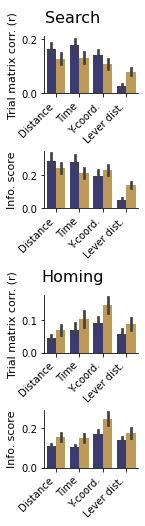

In [57]:
from scipy import stats
import seaborn as sns


def plotTrialMatrixInternalCorrelation(gs,df,pathType="searchToLeverPath",title="Search",legend=False):

   
    dfSel = df[df.pathType==pathType]
    myDict={"ylabel":{"info":"Info. score",
                      "peakRate":"Peak rate (Hz)",
                     "cor":"Trial matrix corr. (r)"},
           "yMax":{"info":0.4,
                  "peakRate":15.0,
                  "cor":0.25},
             "xTicksValues": ["Distance","Time","Y-coord.","Lever dist."]
           }

   
    
    for i,dv in enumerate(["cor"]):
        ax = fig.add_subplot(gs[i])
        
        sns.barplot(hue = "light", y = dv, x = "behavioralVariable", data = dfSel,order = ["distance","iTime","y","targetDistance"],hue_order=["dark","light"],palette=darkLightColors())
        ax.set_ylabel(myDict["ylabel"][dv])
        ax.set_xlabel("")
        #ax.set_ylim(0,myDict["yMax"][dv])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels(myDict["xTicksValues"], rotation= 45,ha = "right")
        if legend:
            ax.legend(loc=0, frameon=False)
        else:
            ax.legend([],[], frameon=False)
        ax.set_title(title)

def plot1DInfoScore(gs,df,pathType="searchToLeverPath",title="Search",legend=False):

    dfSel = df[df.pathType==pathType]
    myDict={"ylabel":{"info":"Info. score",
                      "peakRate":"Peak rate (Hz)"},
           "yMax":{"info":0.4,
                  "peakRate":15.0},
            "xTicksValues": ["Distance","Time","Y-coord.","Lever dist."]
           }

    
    
    for i,dv in enumerate(["info"]):
        ax = fig.add_subplot(gs[i])
        sns.barplot(hue = "light", y = dv, x = "behavioralVariable", data = dfSel,order = ["distance","iTime","y","targetDistance"],hue_order=["dark","light"], palette=darkLightColors())
        ax.set_ylabel(myDict["ylabel"][dv])
        ax.set_xlabel("")
        #ax.set_ylim(0,myDict["yMax"][dv])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticklabels(myDict["xTicksValues"], rotation= 45,ha = "right")
        if legend:
            ax.legend(loc=0, frameon=False)
        else:
            ax.legend([],[], frameon=False)
        ax.set_title(title)
        
        
def plotReferenceFrameStats(gs):
    gsPlots = gridspec.GridSpecFromSubplotSpec(6, 1, subplot_spec=gs[0],height_ratios=[0.2,1,1]*2)

    
    
    ax = fig.add_subplot(gsPlots[0])
    ax.text(0.5,0.5,"Search",fontsize=16,ha='center', va='center',transform=ax.transAxes)
    ax.axis('off')
    
    ax = fig.add_subplot(gsPlots[3])
    ax.text(0.5,0.5,"Homing",fontsize=16,ha='center', va='center',transform=ax.transAxes)
    ax.axis('off')
    
    
    gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[1]) 
    plotTrialMatrixInternalCorrelation(gs2,dfTMIC,pathType="searchToLeverPath",title="",legend=False)

    
    gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[2]) 
    plot1DInfoScore(gs2,dfInfo,pathType="searchToLeverPath",title="",legend=False)

    
    gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[4]) 
    plotTrialMatrixInternalCorrelation(gs2,dfTMIC,pathType="homingFromLeavingLeverToPeriphery",title="",legend=False)

    
    gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[5]) 
    plot1DInfoScore(gs2,dfInfo,pathType="homingFromLeavingLeverToPeriphery",title="")


col=1
row=4
sizePerRow, sizePerCol = figurePanelDefaultSize()

fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 

gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure

plotReferenceFrameStats(gs)

# Statistics for trial matrix corr. and info score

This type of data is perhaps better analyzed with an ANOVA rather than using a bunch of t-tests or Mann-Whitney tests.

We can treat search and homing behavior separately.

We could do 2 ANOVA with 2 factors.

Dependent variable: 
* cor

Factors
* var (4 levels, between or within-subject)
* light (4 levels, between-subject)

It seems that python does not have a function for mixed (between-subjects and within-subjects) anova. We can process the data as between subject factors, although we will have lower statistical power.



In [58]:
dfTMIC

,Unnamed: 0,cluId,pathType,light,behavioralVariable,cor
0,0,mn5824-20112020-0107_92,searchToLeverPath,light,distance,0.034151
7,7,mn5824-22112020-0107_110,searchToLeverPath,light,distance,0.028118
8,8,mn5824-22112020-0107_114,searchToLeverPath,light,distance,0.322231
9,9,mn5824-22112020-0107_116,searchToLeverPath,light,distance,0.025914
11,11,mn5824-22112020-0107_124,searchToLeverPath,light,distance,0.031686
...,...,...,...,...,...,...
6989,419,mn9686-01112021-0106_37,homingFromLeavingLeverToPeriphery,dark,y,0.178850
6990,420,mn9686-01112021-0106_40,homingFromLeavingLeverToPeriphery,dark,y,-0.007484
6996,426,mn9686-01112021-0106_63,homingFromLeavingLeverToPeriphery,dark,y,0.021953
7006,436,mn9686-01112021-0106_242,homingFromLeavingLeverToPeriphery,dark,y,0.098194


We start with the search behavior

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

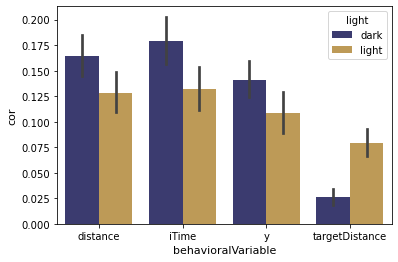

                                   sum_sq      df          F        PR(>F)
C(light)                         0.099505     1.0   5.448231  1.970925e-02
C(behavioralVariable)            2.645804     3.0  48.288992  6.782242e-30
C(light):C(behavioralVariable)   0.657206     3.0  11.994764  9.083495e-08
Residual                        29.733272  1628.0        NaN           NaN


In [60]:
pathType = "searchToLeverPath"
df = dfTMIC[dfTMIC["pathType"]==pathType]

sns.barplot(hue = "light", y = "cor", x = "behavioralVariable", data = df,order = ["distance","iTime","y","targetDistance"],hue_order=["dark","light"],palette=darkLightColors())
plt.show()

#perform two-way ANOVA
model = ols('cor ~ C(light) + C(behavioralVariable) + C(light):C(behavioralVariable)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))


There is a significant interaction. We can simple main effects. Which is similar to perform an anova at each level of one factor. (Effect of light for distance, effect of light at iTime, etc).

We should normally use the error term of the main ANOVA as it is a better estimate, but we will not use it now.

In [61]:
for level  in df["behavioralVariable"].unique():
    print(level.capitalize())
    dfSel = df[df["behavioralVariable"] == level]
    model = ols('cor ~ C(light)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))
    print()
    

Distance
            sum_sq     df         F    PR(>F)
C(light)  0.134588    1.0  6.310777  0.012387
Residual  8.679951  407.0       NaN       NaN

Itime
             sum_sq     df         F    PR(>F)
C(light)   0.219470    1.0  8.532095  0.003684
Residual  10.469199  407.0       NaN       NaN

Targetdistance
            sum_sq     df          F        PR(>F)
C(light)  0.290650    1.0  41.864444  2.813551e-10
Residual  2.825653  407.0        NaN           NaN

Y
            sum_sq     df        F    PR(>F)
C(light)  0.112003    1.0  5.87555  0.015787
Residual  7.758468  407.0      NaN       NaN



We can also do the analysis the other way around. We need to do pairwise t-tests to compare across the different levels.

Light


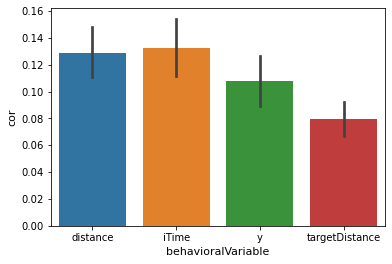

                          sum_sq     df        F    PR(>F)
C(behavioralVariable)   0.363315    3.0  6.58951  0.000211
Residual               15.070350  820.0      NaN       NaN
                             coef   std err         t     P>|t|  \
iTime-distance           0.003775  0.013358  0.282583  0.777568   
targetDistance-distance -0.049135  0.013358 -3.678364  0.000250   
y-distance              -0.020415  0.013358 -1.528287  0.126827   
targetDistance-iTime    -0.052910  0.013358 -3.960947  0.000081   
y-iTime                 -0.024189  0.013358 -1.810870  0.070527   
y-targetDistance         0.028720  0.013358  2.150077  0.031841   

                         Conf. Int. Low  Conf. Int. Upp.  pvalue-sh  reject-sh  
iTime-distance                -0.022445         0.029994   0.777568      False  
targetDistance-distance       -0.075355        -0.022915   0.001250       True  
y-distance                    -0.046634         0.005805   0.253654      False  
targetDistance-iTime         

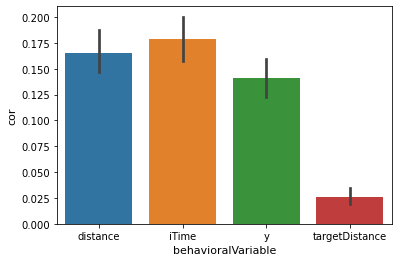

                          sum_sq     df          F        PR(>F)
C(behavioralVariable)   2.939694    3.0  53.997265  8.127453e-32
Residual               14.662922  808.0        NaN           NaN
                             coef   std err          t         P>|t|  \
iTime-distance           0.013824  0.013371   1.033856  3.015129e-01   
targetDistance-distance -0.138733  0.013371 -10.375495  9.211288e-24   
y-distance              -0.023598  0.013371  -1.764865  7.796426e-02   
targetDistance-iTime    -0.152557  0.013371 -11.409351  4.629623e-28   
y-iTime                 -0.037422  0.013371  -2.798720  5.252761e-03   
y-targetDistance         0.115135  0.013371   8.610631  3.772426e-17   

                         Conf. Int. Low  Conf. Int. Upp.     pvalue-sh  \
iTime-distance                -0.012423         0.040070  3.015129e-01   
targetDistance-distance       -0.164980        -0.112487  4.605644e-23   
y-distance                    -0.049845         0.002648  1.559285e-01   
targ

In [62]:
for level  in df["light"].unique():
    print(level.capitalize())
    dfSel = df[df["light"] == level]
    sns.barplot(y = "cor", x = "behavioralVariable", data = dfSel,order = ["distance","iTime","y","targetDistance"])
    plt.show()
    
    model = ols('cor ~ C(behavioralVariable)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))
    pw = model.t_test_pairwise("C(behavioralVariable)",method="sh")
    print(pw.result_frame)
    print()

Now we can repeat the same procedure for the homing path.

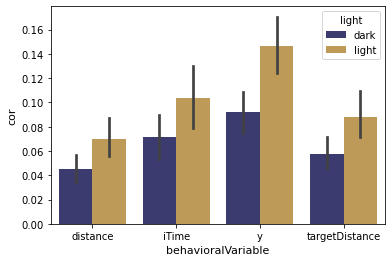

                                   sum_sq      df          F        PR(>F)
C(light)                         0.455315     1.0  27.598572  1.717109e-07
C(behavioralVariable)            0.745953     3.0  15.071776  1.161443e-09
C(light):C(behavioralVariable)   0.045217     3.0   0.913600  4.336160e-01
Residual                        23.756818  1440.0        NaN           NaN


In [63]:
pathType = "homingFromLeavingLeverToPeriphery"
df = dfTMIC[dfTMIC["pathType"]==pathType]

sns.barplot(hue = "light", y = "cor", x = "behavioralVariable", data = df,order = ["distance","iTime","y","targetDistance"],hue_order=["dark","light"],palette=darkLightColors())
plt.show()

#perform two-way ANOVA
model = ols('cor ~ C(light) + C(behavioralVariable) + C(light):C(behavioralVariable)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))


In [64]:
pw = model.t_test_pairwise("C(behavioralVariable)",method="sh")
print(pw.result_frame)

                             coef   std err         t     P>|t|  \
iTime-distance           0.026311  0.013539  1.943343  0.052169   
targetDistance-distance  0.012671  0.013539  0.935867  0.349499   
y-distance               0.046788  0.013539  3.455725  0.000565   
targetDistance-iTime    -0.013640  0.013539 -1.007476  0.313875   
y-iTime                  0.020476  0.013539  1.512382  0.130656   
y-targetDistance         0.034117  0.013539  2.519858  0.011848   

                         Conf. Int. Low  Conf. Int. Upp.  pvalue-sh  reject-sh  
iTime-distance                -0.000247         0.052870   0.208677      False  
targetDistance-distance       -0.013888         0.039229   0.349499      False  
y-distance                     0.020229         0.073346   0.003389       True  
targetDistance-iTime          -0.040199         0.012918   0.349499      False  
y-iTime                       -0.006082         0.047035   0.349499      False  
y-targetDistance               0.007558     

We should also compare directly the lever distance scores from search and homing behavior. 

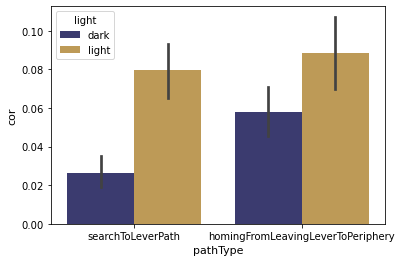

                        sum_sq     df          F        PR(>F)
C(light)              0.349884    1.0  35.727684  3.474614e-09
C(pathType)           0.078711    1.0   8.037404  4.702659e-03
C(light):C(pathType)  0.024981    1.0   2.550856  1.106464e-01
Residual              7.511293  767.0        NaN           NaN


In [65]:
df = dfTMIC[dfTMIC["behavioralVariable"]=="targetDistance"]
sns.barplot(hue = "light", y = "cor", x = "pathType", data = df,hue_order=["dark","light"],palette=darkLightColors())
plt.show()
#perform two-way ANOVA
model = ols('cor ~ C(light) + C(pathType) +C(light):C(pathType)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))



Searchtoleverpath


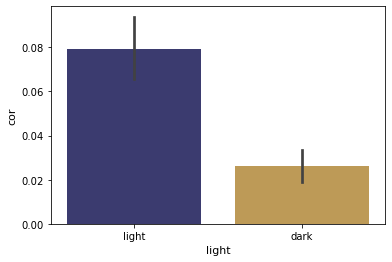

            sum_sq     df          F        PR(>F)
C(light)  0.290650    1.0  41.864444  2.813551e-10
Residual  2.825653  407.0        NaN           NaN

Homingfromleavinglevertoperiphery


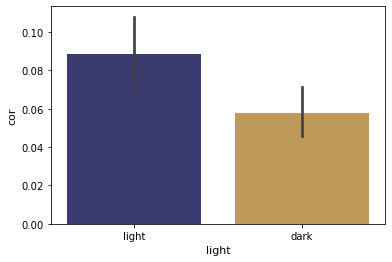

            sum_sq     df         F    PR(>F)
C(light)  0.084215    1.0  6.470294  0.011387
Residual  4.685639  360.0       NaN       NaN



In [66]:
for level  in df["pathType"].unique():
    print(level.capitalize())
    dfSel = df[df["pathType"] == level]
    sns.barplot(y = "cor", x = "light", data = dfSel,hue_order=["dark","light"],palette=darkLightColors())
    plt.show()
    
    model = ols('cor ~ C(light)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))
    print()

Light


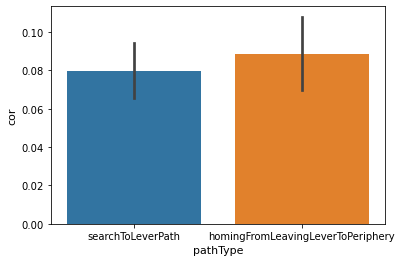

               sum_sq     df         F    PR(>F)
C(pathType)  0.007676    1.0  0.554808  0.456813
Residual     5.340122  386.0       NaN       NaN

Dark


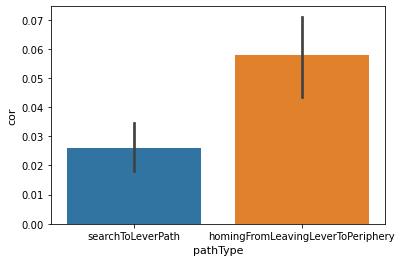

               sum_sq     df          F   PR(>F)
C(pathType)  0.096016    1.0  16.849049  0.00005
Residual     2.171171  381.0        NaN      NaN



In [67]:
for level  in df["light"].unique():
    print(level.capitalize())
    dfSel = df[df["light"] == level]
    sns.barplot(y = "cor", x = "pathType", data = dfSel)
    plt.show()
    
    model = ols('cor ~ C(pathType)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))
    print()

Now same analysis on information scores to see if we reach similar conclusions.

In [68]:
dfInfo

,session,cluId,light,behavioralVariable,meanRate,info,minX,maxX,peakRate,peakLoc,pathType
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,distance,14.761577,0.014007,0.0,52.433,14.784263,11,searchToLeverPath
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,iTime,14.761577,0.026358,0.0,2.036,17.791563,14,searchToLeverPath
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,targetDistance,14.761577,0.029117,12.0,45.007,15.911520,1,searchToLeverPath
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,y,14.761577,0.018356,-42.5,1.043,19.253985,14,searchToLeverPath
0,mn5824-22112020-0107,mn5824-22112020-0107_110,light,distance,5.623381,0.077182,0.0,90.895,11.774741,14,searchToLeverPath
...,...,...,...,...,...,...,...,...,...,...,...
20,mn9686-01112021-0106,mn9686-01112021-0106_37,dark,y,6.546855,0.140519,-35.0,-1.195,10.346887,0,homingFromLeavingLeverToPeriphery
21,mn9686-01112021-0106,mn9686-01112021-0106_40,dark,y,4.557125,0.062371,-35.0,-1.195,5.849394,2,homingFromLeavingLeverToPeriphery
28,mn9686-01112021-0106,mn9686-01112021-0106_63,dark,y,3.851091,0.086221,-35.0,-1.195,5.848240,0,homingFromLeavingLeverToPeriphery
60,mn9686-01112021-0106,mn9686-01112021-0106_242,dark,y,3.690629,0.209501,-35.0,-1.195,4.505524,11,homingFromLeavingLeverToPeriphery


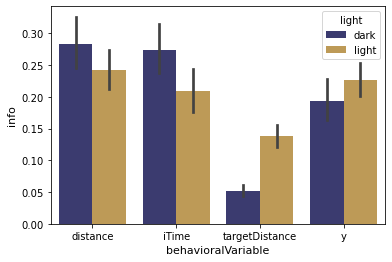

                                   sum_sq      df          F        PR(>F)
C(light)                         0.004836     1.0   0.095964  7.567674e-01
C(behavioralVariable)            6.815792     3.0  45.083192  5.505660e-28
C(light):C(behavioralVariable)   1.455292     3.0   9.626058  2.673428e-06
Residual                        82.041728  1628.0        NaN           NaN


In [69]:
pathType = "searchToLeverPath"
df = dfInfo[dfInfo["pathType"]==pathType]

sns.barplot(hue = "light", y = "info", x = "behavioralVariable", data = df,hue_order=["dark","light"],palette=darkLightColors())
plt.show()

#perform two-way ANOVA
model = ols('info ~ C(light) + C(behavioralVariable) + C(light):C(behavioralVariable)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))


In [70]:
for level  in df["behavioralVariable"].unique():
    print(level.capitalize())
    dfSel = df[df["behavioralVariable"] == level]
    model = ols('info ~ C(light)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))
    print()
    

Distance
             sum_sq     df         F    PR(>F)
C(light)   0.166437    1.0  2.298485  0.130277
Residual  29.471604  407.0       NaN       NaN

Itime
             sum_sq     df         F    PR(>F)
C(light)   0.431124    1.0  6.074501  0.014127
Residual  28.885921  407.0       NaN       NaN

Targetdistance
            sum_sq     df          F        PR(>F)
C(light)  0.747661    1.0  71.939763  4.149718e-16
Residual  4.229899  407.0        NaN           NaN

Y
             sum_sq     df         F    PR(>F)
C(light)   0.114906    1.0  2.403919  0.121809
Residual  19.454305  407.0       NaN       NaN



Light


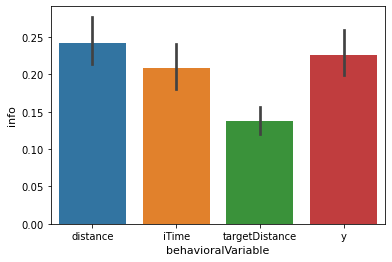

                          sum_sq     df          F        PR(>F)
C(behavioralVariable)   1.325535    3.0  10.903137  5.001651e-07
Residual               33.230164  820.0        NaN           NaN
                             coef   std err         t         P>|t|  \
iTime-distance          -0.034030  0.019835 -1.715611  8.661094e-02   
targetDistance-distance -0.105021  0.019835 -5.294629  1.532587e-07   
y-distance              -0.015970  0.019835 -0.805106  4.209918e-01   
targetDistance-iTime    -0.070991  0.019835 -3.579018  3.651454e-04   
y-iTime                  0.018060  0.019835  0.910505  3.628237e-01   
y-targetDistance         0.089051  0.019835  4.489523  8.160153e-06   

                         Conf. Int. Low  Conf. Int. Upp.     pvalue-sh  \
iTime-distance                -0.072964         0.004904  2.598328e-01   
targetDistance-distance       -0.143955        -0.066087  9.195524e-07   
y-distance                    -0.054904         0.022965  4.209918e-01   
targetDista

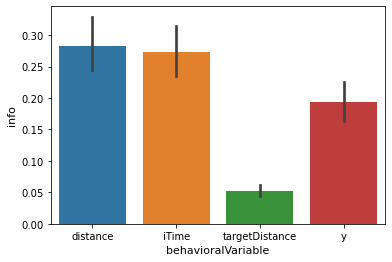

                          sum_sq     df          F        PR(>F)
C(behavioralVariable)   6.945548    3.0  38.324272  3.675717e-23
Residual               48.811564  808.0        NaN           NaN
                             coef   std err         t         P>|t|  \
iTime-distance          -0.009441  0.024396 -0.386983  6.988704e-01   
targetDistance-distance -0.230881  0.024396 -9.463780  3.160709e-20   
y-distance              -0.089840  0.024396 -3.682523  2.462995e-04   
targetDistance-iTime    -0.221440  0.024396 -9.076797  8.393712e-19   
y-iTime                 -0.080399  0.024396 -3.295539  1.025157e-03   
y-targetDistance         0.141041  0.024396  5.781258  1.058919e-08   

                         Conf. Int. Low  Conf. Int. Upp.     pvalue-sh  \
iTime-distance                -0.057328         0.038447  6.988704e-01   
targetDistance-distance       -0.278768        -0.182993  1.896426e-19   
y-distance                    -0.137727        -0.041952  7.388986e-04   
targetDista

In [71]:
for level  in df["light"].unique():
    print(level.capitalize())
    dfSel = df[df["light"] == level]
    sns.barplot(y = "info", x = "behavioralVariable", data = dfSel)
    plt.show()
    
    model = ols('info ~ C(behavioralVariable)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))
    pw = model.t_test_pairwise("C(behavioralVariable)",method="sh")
    print(pw.result_frame)
    print()

repeat with homing paths

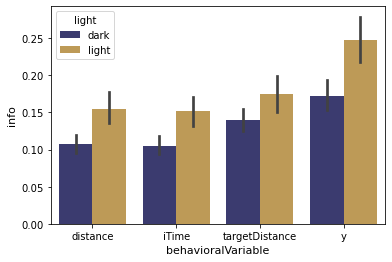

                                   sum_sq      df          F        PR(>F)
C(light)                         0.933286     1.0  46.662609  1.240265e-11
C(behavioralVariable)            1.561507     3.0  26.024170  2.151716e-16
C(light):C(behavioralVariable)   0.078948     3.0   1.315753  2.676603e-01
Residual                        28.801041  1440.0        NaN           NaN


In [72]:
pathType = "homingFromLeavingLeverToPeriphery"
df = dfInfo[dfInfo["pathType"]==pathType]

sns.barplot(hue = "light", y = "info", x = "behavioralVariable", data = df,hue_order=["dark","light"],palette=darkLightColors())
plt.show()

#perform two-way ANOVA
model = ols('info ~ C(light) + C(behavioralVariable) + C(light):C(behavioralVariable)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

In [73]:
pw = model.t_test_pairwise("C(behavioralVariable)",method="sh")
print(pw.result_frame)

                             coef   std err         t     P>|t|  \
iTime-distance          -0.002580  0.014907 -0.173047  0.862639   
targetDistance-distance  0.031740  0.014907  2.129165  0.033410   
y-distance               0.064688  0.014907  4.339324  0.000015   
targetDistance-iTime     0.034320  0.014907  2.302212  0.021465   
y-iTime                  0.067268  0.014907  4.512371  0.000007   
y-targetDistance         0.032948  0.014907  2.210159  0.027251   

                         Conf. Int. Low  Conf. Int. Upp.  pvalue-sh  reject-sh  
iTime-distance                -0.031822         0.026663   0.862639      False  
targetDistance-distance        0.002498         0.060983   0.066820      False  
y-distance                     0.035445         0.093931   0.000076       True  
targetDistance-iTime           0.005077         0.063562   0.066820      False  
y-iTime                        0.038025         0.096510   0.000042       True  
y-targetDistance               0.003705     

compare directly lever distance of search and homing

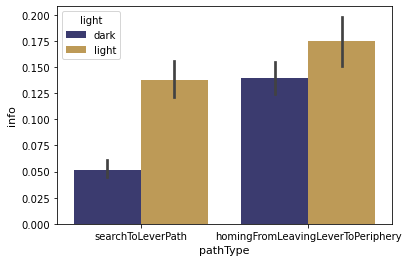

                         sum_sq     df          F        PR(>F)
C(light)               0.738149    1.0  51.394255  1.779285e-12
C(pathType)            0.747903    1.0  52.073360  1.286850e-12
C(light):C(pathType)   0.121574    1.0   8.464728  3.725723e-03
Residual              11.016022  767.0        NaN           NaN


In [74]:
df = dfInfo[dfInfo["behavioralVariable"]=="targetDistance"]
sns.barplot(hue = "light", y = "info", x = "pathType", data = df,hue_order=["dark","light"],palette=darkLightColors())
plt.show()
#perform two-way ANOVA
model = ols('info ~ C(light) + C(pathType) +C(light):C(pathType)', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))


Searchtoleverpath


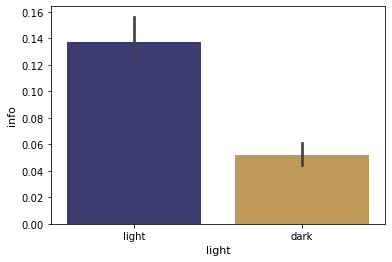

            sum_sq     df          F        PR(>F)
C(light)  0.747661    1.0  71.939763  4.149718e-16
Residual  4.229899  407.0        NaN           NaN

Homingfromleavinglevertoperiphery


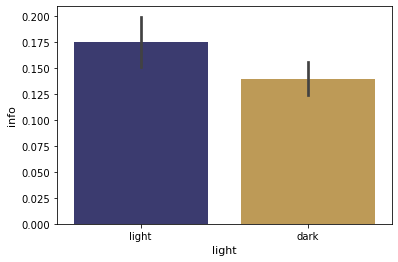

            sum_sq     df         F    PR(>F)
C(light)  0.112063    1.0  5.944858  0.015243
Residual  6.786122  360.0       NaN       NaN



In [75]:
for level  in df["pathType"].unique():
    print(level.capitalize())
    dfSel = df[df["pathType"] == level]
    sns.barplot(y = "info", x = "light", data = dfSel,hue_order=["dark","light"],palette=darkLightColors())
    plt.show()
    
    model = ols('info ~ C(light)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))
    print()

Light


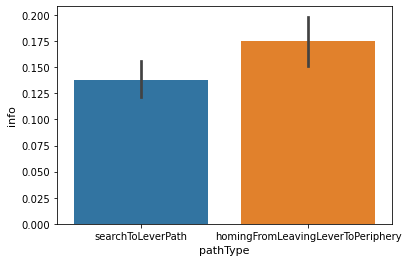

               sum_sq     df         F    PR(>F)
C(pathType)  0.135202    1.0  6.311552  0.012402
Residual     8.268634  386.0       NaN       NaN

Dark


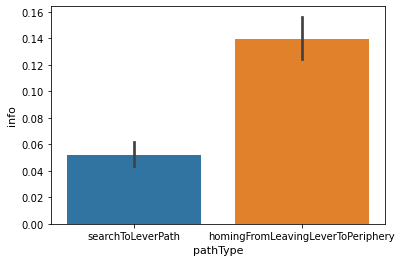

               sum_sq     df           F        PR(>F)
C(pathType)  0.734275    1.0  101.827202  2.233035e-21
Residual     2.747388  381.0         NaN           NaN



In [76]:
for level  in df["light"].unique():
    print(level.capitalize())
    dfSel = df[df["light"] == level]
    sns.barplot(y = "info", x = "pathType", data = dfSel)
    plt.show()
    
    model = ols('info ~ C(pathType)', data=dfSel).fit()
    print(sm.stats.anova_lm(model, typ=2))
    print()

### Summary of figure, examples and stats

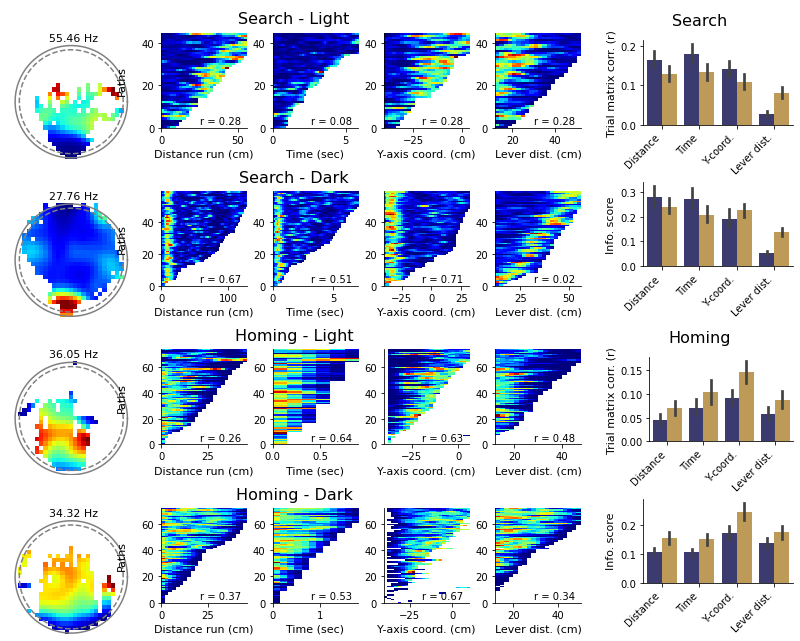

In [77]:
col=5
row=4
sizePerCol=2.2
sizePerRow=2.2    
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 

gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure
gsPlots = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0],width_ratios=[3,0.1,1])

gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[0]) 
plotExampleCellPanel(gs1)

gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[2]) 
plotReferenceFrameStats(gs2)

# Map stack during search path

These are the 1D maps used to calculate the information scores.

We use the 1D fields that inlcudes similar length of data across light and dark paths. 

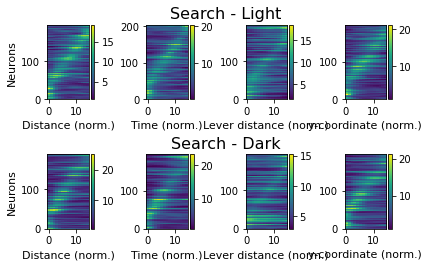

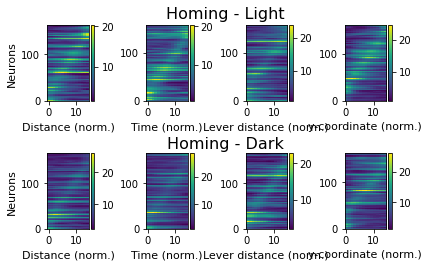

In [78]:
from scipy.ndimage import gaussian_filter

def plot1DMatrices(gs=None,minMeanRate=2.5,pathType = "searchToLeverPath",df=None):
    
    light_keys = [pathType+"_light_distance", pathType+"_light_iTime", pathType+"_light_targetDistance",pathType+"_light_y"]
    dark_keys = [pathType+"_dark_distance", pathType+"_dark_iTime", pathType+"_dark_targetDistance",pathType+"_dark_y"]
    
    
    gsTitle = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=gs[0],height_ratios=[0.01,0.48,0.01,0.48])
    
    if pathType == "searchToLeverPath":
        titlePath = "Search"
    else :
        titlePath = "Homing"
    
    
    ax = fig.add_subplot(gsTitle[0])
    ax.text(0.54,-0.5,titlePath+" - Light",fontsize=16,horizontalalignment='center')
    ax.axis('off')
    ax = fig.add_subplot(gsTitle[2])
    ax.text(0.54,-0.5,titlePath+" - Dark",fontsize=16,horizontalalignment='center')
    ax.axis('off')
   
    
    
    gs0 = gridspec.GridSpecFromSubplotSpec(4, 4, subplot_spec=gs[0],height_ratios=[0.1,0.48,0.1,0.48])
    
    xLabels= {pathType+"_light_distance": "Distance (norm.)" ,
              pathType+"_dark_distance": "Distance (norm.)",
              pathType+"_light_iTime": "Time (norm.)",
              pathType+"_dark_iTime": "Time (norm.)",
              pathType+"_light_targetDistance": "Lever distance (norm.)",
              pathType+"_dark_targetDistance": "Lever distance (norm.)",
              pathType+"_light_y": "y-coordinate (norm.)",
              pathType+"_dark_y": "y-coordinate (norm.)",}
    
    for i,k in enumerate(list(df.keys())[0:8]):
        y = int(i/2)
        x = int(i%2)*2+1
        ax = fig.add_subplot(gs0[x,y])
        
        m = df[k]
        peakSel = m.mean(axis=1) > minMeanRate
        m = m[peakSel]
        mSort = m[np.argsort((np.argmax(m,axis=1)))]
        #mSort = mSort/mSort.max(axis=1).reshape(mSort.shape[0],-1)
        mSort = gaussian_filter(mSort, sigma=1)
        #mSort = mSort/mSort.max(axis=1).reshape(mSort.shape[0],-1)
        
        
        im = ax.imshow(mSort,interpolation="none",aspect="auto",origin="lower")
        if y == 0:
            ax.set_ylabel("Neurons")
        ax.set_xlabel(xLabels[k])
        plt.colorbar(im)
    plt.show()

col=3
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure
plot1DMatrices(gs=gs,minMeanRate=2.5,pathType = "searchToLeverPath", df = oneDSearchHistoSel)

col=3
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure
plot1DMatrices(gs=gs,minMeanRate=2.5,pathType = "homingFromLeavingLeverToPeriphery", df = oneDHomingHistoSel)


# Proportion of lever-anchored cells

We need to find neurons that encode position relative to the lever. 

We would like to see more of them during the search-light than search-dark, and more during homing-dark than search-dark. In the search-dark, the animal has no information regarding the position of the lever.

This would show that when you are approaching a destination, some neurons encode the distance to the destination. This can't happen when you don't know/see the destination.

When you leave the lever, some neurons are anchored to the lever position, even when you don't have visual cues. This analysis would go well with the next figure about lever anchored field directly next to the lever.

We will look at the location of the peak rate in the y-coordinate trial matrix as a function of lever position.


We already calculated the trial matrix internal correlation and the correlation between firing rate peaks in y-coordinate matrices and lever location.

In [79]:
peakPositionLeverPositionCorr

,Unnamed: 0,cluId,light,pathType,coordX,shuf,cor,slope,intercept
0,0,mn5824-20112020-0107_92,dark,homingFromLeavingLeverToPeriphery,y,False,0.478407,0.401768,18.790998
1,0,mn5824-20112020-0107_92,dark,homingFromLeavingLeverToPeriphery,y,True,0.441712,0.378815,17.196184
2,1,mn5824-20112020-0107_92,dark,homingFromLeavingLeverToPeriphery,y,True,0.396185,0.405045,19.958288
3,2,mn5824-20112020-0107_92,dark,homingFromLeavingLeverToPeriphery,y,True,0.331640,0.294068,16.679232
4,3,mn5824-20112020-0107_92,dark,homingFromLeavingLeverToPeriphery,y,True,0.322239,0.320861,19.342175
...,...,...,...,...,...,...,...,...,...
20035,495,mn711-31012021-0107_95,dark,homingFromLeavingLeverToPeriphery,y,True,0.395520,0.313254,13.033931
20036,496,mn711-31012021-0107_95,dark,homingFromLeavingLeverToPeriphery,y,True,0.389250,0.290772,12.695681
20037,497,mn711-31012021-0107_95,dark,homingFromLeavingLeverToPeriphery,y,True,0.199310,0.140278,12.540324
20038,498,mn711-31012021-0107_95,dark,homingFromLeavingLeverToPeriphery,y,True,0.384501,0.310447,14.223126


In [80]:
trialMatrixCor

,Unnamed: 0,cluId,pathType,light,behavioralVariable,cor
0,0,mn5824-20112020-0107_92,searchToLeverPath,light,distance,0.034151
1,1,mn5824-20112020-0107_100,searchToLeverPath,light,distance,0.016818
2,2,mn5824-20112020-0107_114,searchToLeverPath,light,distance,0.009486
3,3,mn5824-20112020-0107_116,searchToLeverPath,light,distance,0.141073
4,4,mn5824-20112020-0107_118,searchToLeverPath,light,distance,0.152111
...,...,...,...,...,...,...
7003,433,mn9686-01112021-0106_79,homingFromLeavingLeverToPeriphery,dark,y,0.156115
7004,434,mn9686-01112021-0106_81,homingFromLeavingLeverToPeriphery,dark,y,NaN
7005,435,mn9686-01112021-0106_197,homingFromLeavingLeverToPeriphery,dark,y,0.281917
7006,436,mn9686-01112021-0106_242,homingFromLeavingLeverToPeriphery,dark,y,0.098194


### Cell selection

Because the analysis uses peak rate of single trials, we need neurons with higher firing rate peak that presumably fire on most trials. 

That is why we need to only include neurons with high peak rate. 

We can also select neurons with a significant trial matrix internal correlation either with y or lever distance.


In [81]:
trialMatrixSign

,Unnamed: 0,cluId,homingFromLeavingLeverToPeriphery-light-y,homingFromLeavingLeverToPeriphery-light-targetDistance,searchToLeverPath-light-y,searchToLeverPath-light-targetDistance,homingFromLeavingLeverToPeriphery-dark-y,homingFromLeavingLeverToPeriphery-dark-targetDistance,searchToLeverPath-dark-y,searchToLeverPath-dark-targetDistance
0,2,mn5824-20112020-0107_92,False,False,False,False,True,False,True,False
1,5,mn5824-20112020-0107_100,False,False,False,False,True,False,False,False
2,7,mn5824-20112020-0107_114,False,False,False,False,True,False,True,False
3,8,mn5824-20112020-0107_116,False,False,False,False,True,False,True,False
4,9,mn5824-20112020-0107_118,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
433,1243,mn9686-01112021-0106_79,True,False,True,True,True,False,True,False
434,1244,mn9686-01112021-0106_81,False,False,False,False,False,False,False,False
435,1255,mn9686-01112021-0106_197,False,False,True,True,True,True,False,False
436,1266,mn9686-01112021-0106_242,True,True,True,False,True,True,True,True


In [82]:
oneDSearchStatsSel["pathType"] = "searchToLeverPath"
oneDHomingStatsSel["pathType"] = "homingFromLeavingLeverToPeriphery"
oneDStats  = pd.concat([oneDSearchStatsSel,oneDHomingStatsSel])
oneDStats
df = oneDStats
df

,session,cluId,light,behavioralVariable,meanRate,info,minX,maxX,peakRate,peakLoc,pathType
2,mn5824-20112020-0107,mn5824-20112020-0107_92,light,distance,14.761577,0.014007,0.0,52.433,14.784263,11,searchToLeverPath
5,mn5824-20112020-0107,mn5824-20112020-0107_100,light,distance,0.740231,0.206911,0.0,52.433,0.831569,6,searchToLeverPath
7,mn5824-20112020-0107,mn5824-20112020-0107_114,light,distance,1.652608,0.157766,0.0,52.433,2.821333,7,searchToLeverPath
8,mn5824-20112020-0107,mn5824-20112020-0107_116,light,distance,0.094681,1.572155,0.0,52.433,0.258257,10,searchToLeverPath
9,mn5824-20112020-0107,mn5824-20112020-0107_118,light,distance,0.068859,0.840414,0.0,52.433,0.091245,0,searchToLeverPath
...,...,...,...,...,...,...,...,...,...,...,...
37,mn9686-01112021-0106,mn9686-01112021-0106_79,dark,y,0.898588,1.309616,-35.0,-1.195,0.929857,3,homingFromLeavingLeverToPeriphery
38,mn9686-01112021-0106,mn9686-01112021-0106_81,dark,y,0.112323,NaN,-35.0,-1.195,0.000000,0,homingFromLeavingLeverToPeriphery
49,mn9686-01112021-0106,mn9686-01112021-0106_197,dark,y,1.444159,1.529129,-35.0,-1.195,1.145301,14,homingFromLeavingLeverToPeriphery
60,mn9686-01112021-0106,mn9686-01112021-0106_242,dark,y,3.690629,0.209501,-35.0,-1.195,4.505524,11,homingFromLeavingLeverToPeriphery


In [83]:
peakRateThreshold=7.5

cellSelection={}
for i, (light,pathType) in enumerate(zip(["light","light","dark","dark"],["searchToLeverPath","homingFromLeavingLeverToPeriphery","searchToLeverPath","homingFromLeavingLeverToPeriphery"])):
    # cells with peak above 10 Hz in y map
    rateSelected1 = df.cluId[(df["light"]==light)&(df["pathType"]==pathType)&(df["behavioralVariable"]=="y")&(df["peakRate"]>peakRateThreshold)]
    # cells with peak above 10 Hz in targetDistance map
    rateSelected2 = df.cluId[(df["light"]==light)&(df["pathType"]==pathType)&(df["behavioralVariable"]=="targetDistance")&(df["peakRate"]>peakRateThreshold)]
    
    rateSelected = pd.concat([rateSelected1,rateSelected2]).unique()
     
    
    # cells with significant trial matrix internal correlation for y or lever distance
    matrixSelected = trialMatrixSign[(trialMatrixSign["{}-{}-{}".format(pathType,light,"y")]) | (trialMatrixSign["{}-{}-{}".format(pathType,light,"targetDistance")])].cluId
    
    
    cellSelection[pathType+"-"+light] = pd.Series(rateSelected[pd.Series(rateSelected).isin(matrixSelected)])

In [84]:
for k in cellSelection.keys():
    print(k)
    print(len(cellSelection[k]))

searchToLeverPath-light
105
homingFromLeavingLeverToPeriphery-light
81
searchToLeverPath-dark
108
homingFromLeavingLeverToPeriphery-dark
75


In [85]:
m = np.array([len(cellSelection['searchToLeverPath-light']),
 len(cellSelection['searchToLeverPath-dark']),
 len(cellSelection['homingFromLeavingLeverToPeriphery-light']),
 len(cellSelection['homingFromLeavingLeverToPeriphery-dark'])])
print(m)
chisquare(m)

[105 108  81  75]


Power_divergenceResult(statistic=9.048780487804878, pvalue=0.028649304872413486)

# Plot lever position / peak rate correlation

We need a plot to explain this analysis with examples.

In [86]:
from scipy import stats
from sklearn.linear_model import LinearRegression
from numba import jit

@jit()
def myOwnCorr2(x,y):
    """
    This one assumes that there are no np.nan
    """
    if np.all(x==0):
        return np.nan
    if np.all(y==0):
        return np.nan   
    else :
        return np.corrcoef(x,y)[0,1]

def trialPeakLeverPosPlot(gs, cluId,pathType,coordX,light,showTrialMatrixR=False,matrixYAxisX=-0.4):
    
    nCol = 4
    
    if showTrialMatrixR:
        nCol+=1
    
    gs0 = gridspec.GridSpecFromSubplotSpec(1, nCol, subplot_spec=gs[0])
    
    sessionName = cluId.split("_")[0]
    ses = myProjectWithTrials.sessionList[[ses.name == sessionName for ses in myProjectWithTrials.sessionList].index(True)]
    ifr, navs, inav = load_ifr_behavior(ses)
    navsSel = navs[(navs.type==pathType) & (navs.light==light)]
    trialDf = ses.getTrialVariablesDataFrame()
    navsSel = pd.merge(navsSel,trialDf,on = "trialNo")
    #print("navsSel shape:",navsSel.shape)
    navsSel
    
    # get the original trial map
    if pathType == "searchToLeverPath":
        myDict = mySearchDict
    else:
        myDict = myHomingDict
    m = myDict[cluId]["matrix"][pathType+"_"+light+"_"+coordX]["matrix"].copy()
    nTrials = m.shape[0]
    
    if m.shape[0] != navsSel.shape[0]:
        print("m and navsSel shapes do not match {} {}".format(m.shape[0],navsSel.shape[0]))
        
    # cut the matrix so that the trials ends at the longest trial of this type
    nBins = m.shape[1]
    minIndex = np.where(~np.all(np.isnan(m),axis=0))[0].min() # first column with valid value
    maxIndex = np.where(~np.all(np.isnan(m),axis=0))[0].max() # last column with valid value
    m = m[:,minIndex:maxIndex+1]
    nBinsKept = m.shape[1]
    
    # trial selection if needed
    trialToKeep = ~np.all(np.isnan(m),axis=1) # remove a trial if all firing rate values are np.nan
    trialToKeep = np.logical_and(np.abs(navsSel.homingErrorAtPeriphery) < (np.pi/4),trialToKeep)   # this should give 90 degree range centered on the home base
    
    #print("Keeping {} of {} trials, {} of {} bins".format(np.sum(trialToKeep),nTrials,nBinsKept,nBins))
   
    # get the firing rate peak location for each trial
    m = m[trialToKeep]
    peakLoc = np.nanargmax(m,axis=1)*2 # *2 because every bin is 2 cm
  
  
    # get the y lever position
    leverY= navsSel.leverY.to_numpy()[trialToKeep]
    
   
    r =  myOwnCorr2(leverY,peakLoc)
    model = LinearRegression()
    model.fit(leverY.reshape(-1,1),peakLoc)
    inter = model.intercept_
    slope = model.coef_[0]
    
    x = np.linspace(leverY.min(),leverY.max(),100)
    y = x*slope+inter
    
    
    
    #### plot the trial matrix
    if pathType=="searchToLeverPath":
        myIFR = searchIFR
    else:
        myIFR = homingIFR
    ax = fig.add_subplot(gs0[0]) # get the first column
    plotIFRMatrix(ax,cluId,myIFR, pathType=pathType, light=light,dv=coordX,yAxisX=matrixYAxisX,plotFiringRatePeaks=False)
        
    
    ax = fig.add_subplot(gs0[1]) # get the first column
    plotIFRMatrix(ax,cluId,myIFR, pathType=pathType, light=light,dv="targetDistance",yAxisX=matrixYAxisX)
    
    
    #### plot the correlation
    ax = fig.add_subplot(gs0[2])
    ax.scatter(leverY,peakLoc, s=7)
    ax.plot(x,y,c="grey",alpha=0.5)
    ax.text(0.1,0.8,"r = {:.2f}".format(r),transform=ax.transAxes)
   # ax.text(0.1,0.8,"inter:{:.2f}".format(inter),transform=ax.transAxes)
   # ax.text(0.1,0.7,"slope:{:.2f}".format(slope),transform=ax.transAxes)
    ax.set_xlabel("Lever loc. (cm)")
    ax.set_ylabel("Peak rate loc.")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    
    #### plot the real r value and the shuffled r values
    df = peakPositionLeverPositionCorr
    condIndex = (df["cluId"]==cluId)&(df["light"]==light)&(df["pathType"]==pathType)&(df["shuf"]==True)
    shufR = df[condIndex].cor
    ax = fig.add_subplot(gs0[3])
    res = ax.hist(shufR, label="Shuf. r")
    maxY=np.max(res[0])
    ax.plot([r,r],[0,maxY],color="red", label="Obs. r")
    lowSignLevel = np.percentile(shufR,5.0)
    highSignLevel = np.percentile(shufR,95.0)
    ax.plot([lowSignLevel,lowSignLevel],[0,maxY],color="grey",linestyle="dotted")
    ax.plot([highSignLevel,highSignLevel],[0,maxY],color="grey",linestyle="dotted")
    ax.set_xlim(-0.2,1)
    ax.set_xlabel("Peak-Lever corr. (r)")
    ax.set_ylabel("Frequency")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(frameon=True,loc=(0.01,0.01))
    
    #### Spatial selectivity
    if showTrialMatrixR:
        df = trialMatrixCor
        condIndex = (df["cluId"]==cluId)&(df["light"]==light)&(df["path"]==pathType)&(df["var"]=="y")
        tmic = df[condIndex].cor.values[0]
        df = trialMatrixCorShuf
        condIndex = (df["cluId"]==cluId)&(df["light"]==light)&(df["path"]==pathType)&(df["var"]=="y")
        tmicShuf = df[condIndex].cor
        ax = fig.add_subplot(gs0[4])

        res = ax.hist(tmicShuf, label="Shuf. r")
        maxY=np.max(res[0])
        ax.plot([tmic,tmic],[0,maxY],color="red", label="Obs. r")
        lowSignLevel = np.percentile(tmicShuf,5.0)
        highSignLevel = np.percentile(tmicShuf,95.0)
        ax.plot([lowSignLevel,lowSignLevel],[0,maxY],color="grey",linestyle="dotted")
        ax.plot([highSignLevel,highSignLevel],[0,maxY],color="grey",linestyle="dotted")
        #ax.set_xlim(-0.2,1)
        ax.set_xlabel("Trial matrix corr. (r)")
        ax.set_ylabel("Frequency")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.legend(frameon=False)


IndexError: index -1 is out of bounds for axis 0 with size 0

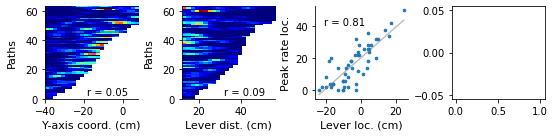

In [87]:
col=4
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(2, 1, figure=fig) # all our figure

#searchToLeverPath light lever: 20
#searchToLeverPath light no lever: 12
#homingFromLeavingLeverToPeriphery light lever 1 4 15, 25
#homingFromLeavingLeverToPeriphery light no lever 3 16
#homingFromLeavingLeverToPeriphery dark lever 12 23 27
#homingFromLeavingLeverToPeriphery dark no lever 17 24 30!

gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[0])
pathType="searchToLeverPath"
light="light"
cluId="mn3246-09042021-0106_102" # cellSelection["{}-{}".format(pathType,light)].iloc[20]
trialPeakLeverPosPlot(gs=gs1,cluId=cluId,pathType=pathType,coordX="y",light=light,matrixYAxisX=-0.3)


#gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[1])
#pathType="homingFromLeavingLeverToPeriphery"
#light="light"
#cluId=cellSelection["{}-{}".format(pathType,light)].iloc[1]
#trialPeakLeverPosPlot(gs=gs1,cluId=cluId,pathType=pathType,coordX="y",light=light)


gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1])
pathType="homingFromLeavingLeverToPeriphery"
light="dark"
cluId="mn9686-27102021-0106_36" #cellSelection["{}-{}".format(pathType,light)].iloc[30]
trialPeakLeverPosPlot(gs=gs1,cluId=cluId,pathType=pathType,coordX="y",light=light,matrixYAxisX=-0.3)

In [88]:
for cond in cellSelection.keys():
    cs = cellSelection[cond]
    si = leverPeakCorrSign.cluId[leverPeakCorrSign[cond]==True]
#    print(cond)
#    print(cs[cs.isin(si)])

Get the number of significant neurons out of the spatially selective neurons active in a given condition. 

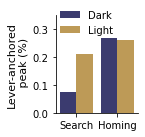

In [89]:
def plotSignLeverAnchoredCells(gs,showLegend=True):

    signDf = pd.DataFrame()
    pathTypeNames = {"searchToLeverPath":"Search",
                    "homingFromLeavingLeverToPeriphery":"Homing"}

    for light in ["light","dark"]:
        for pathType in ["homingFromLeavingLeverToPeriphery", "searchToLeverPath"]:        
            cs = cellSelection["{}-{}".format(pathType,light)]
            si = leverPeakCorrSign.cluId[leverPeakCorrSign["{}-{}".format(pathType,light)]==True]
            nSign=np.sum(cs.isin(si))
            nSel = len(cs)
            signDf = signDf.append(pd.DataFrame({"light":[light.capitalize()],
                                                 "pathType":[pathTypeNames[pathType]],
                                                 "percentageSign":[nSign/nSel],
                                                 "nSign":[nSign],
                                                 "nSel": [nSel] }))
    
    #print(signDf)
    ax = fig.add_subplot(gs[0])
    sns.barplot(x="pathType",y="percentageSign",hue="light",data=signDf,order=["Search","Homing"],hue_order=["Dark","Light"],palette=darkLightColors())
    ax.set_ylim(0,0.35)
    ax.set_ylabel("Lever-anchored\n peak (%)")
    ax.set_xlabel("")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if showLegend:
        ax.legend(loc=(0.005,0.75), frameon=False)
    

col=1
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()

fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure

plotSignLeverAnchoredCells(gs)

In [90]:
signDf = pd.DataFrame()
pathTypeNames = {"searchToLeverPath":"Search",
                "homingFromLeavingLeverToPeriphery":"Homing"}

for light in ["light","dark"]:
    for pathType in ["homingFromLeavingLeverToPeriphery", "searchToLeverPath"]:        
        cs = cellSelection["{}-{}".format(pathType,light)]
        si = leverPeakCorrSign.cluId[leverPeakCorrSign["{}-{}".format(pathType,light)]==True]
        nSign=np.sum(cs.isin(si))
        nSel = len(cs)
        signDf = signDf.append(pd.DataFrame({"light":[light.capitalize()],
                                             "pathType":[pathTypeNames[pathType]],
                                             "percentageSign":[nSign/nSel],
                                             "nSign":[nSign],
                                             "nSel": [nSel],
                                              "nNonSign":[nSel-nSign]}))
signDf

,light,pathType,percentageSign,nSign,nSel,nNonSign
0,Light,Homing,0.259259,21,81,60
0,Light,Search,0.209524,22,105,83
0,Dark,Homing,0.266667,20,75,55
0,Dark,Search,0.074074,8,108,100


In [91]:
LH = [signDf.nSign[(signDf.light=="Light") & (signDf.pathType=="Homing")].values[0],signDf.nNonSign[(signDf.light=="Light") & (signDf.pathType=="Homing")].values[0]]
DH = [signDf.nSign[(signDf.light=="Dark") & (signDf.pathType=="Homing")].values[0],signDf.nNonSign[(signDf.light=="Dark") & (signDf.pathType=="Homing")].values[0]]
LS = [signDf.nSign[(signDf.light=="Light") & (signDf.pathType=="Search")].values[0],signDf.nNonSign[(signDf.light=="Light") & (signDf.pathType=="Search")].values[0]]
DS = [signDf.nSign[(signDf.light=="Dark") & (signDf.pathType=="Search")].values[0],signDf.nNonSign[(signDf.light=="Dark") & (signDf.pathType=="Search")].values[0]]

LH,DH,LS,DS

([21, 60], [20, 55], [22, 83], [8, 100])

In [92]:
from scipy.stats import chisquare

print("chi-square Search / light-dark")
print(chisquare(f_obs = LS, f_exp= DS))
      
print("chi-square Homing / light-dark")
print(chisquare(f_obs = LH, f_exp= DH))
      
    
print("chi-square Search-Dark vs 5%")
print(chisquare(f_obs = DS, f_exp= [5,100]))

print("chi-square SD vs HD")
print(chisquare(f_obs = DS, f_exp= DH))

chi-square Search / light-dark
Power_divergenceResult(statistic=27.39, pvalue=1.6628891951353724e-07)
chi-square Homing / light-dark
Power_divergenceResult(statistic=0.5045454545454545, pvalue=0.4775096687310998)
chi-square Search-Dark vs 5%
Power_divergenceResult(statistic=1.8, pvalue=0.17971249487899593)
chi-square SD vs HD
Power_divergenceResult(statistic=44.01818181818182, pvalue=3.253397020418095e-11)


Get some information about the slope of the regression line for significant neurons

In [96]:
df = peakPositionLeverPositionCorr[peakPositionLeverPositionCorr.shuf==False]
df

,Unnamed: 0,cluId,light,pathType,coordX,shuf,cor,slope,intercept
0,0,mn5824-20112020-0107_92,dark,homingFromLeavingLeverToPeriphery,y,False,0.478407,0.401768,18.790998
501,0,mn5824-20112020-0107_100,dark,homingFromLeavingLeverToPeriphery,y,False,0.120638,0.115529,10.689372
1002,0,mn5824-20112020-0107_114,dark,homingFromLeavingLeverToPeriphery,y,False,0.225878,0.277719,13.249733
1503,0,mn5824-20112020-0107_116,dark,homingFromLeavingLeverToPeriphery,y,False,0.195659,0.142389,6.945831
2004,0,mn5824-20112020-0107_118,dark,homingFromLeavingLeverToPeriphery,y,False,0.485948,0.556097,14.299035
...,...,...,...,...,...,...,...,...,...
875247,0,mn9686-01112021-0106_79,light,searchToLeverPath,y,False,0.283446,0.250662,5.664718
875748,0,mn9686-01112021-0106_81,light,searchToLeverPath,y,False,0.201369,0.145229,2.633183
876249,0,mn9686-01112021-0106_197,light,searchToLeverPath,y,False,0.611403,0.724860,13.627067
876750,0,mn9686-01112021-0106_242,light,searchToLeverPath,y,False,0.337881,0.360838,7.800237


In [97]:
leverPeakCorrSign

,Unnamed: 0,cluId,homingFromLeavingLeverToPeriphery-light,searchToLeverPath-light,homingFromLeavingLeverToPeriphery-dark,searchToLeverPath-dark
0,2,mn5824-20112020-0107_92,False,False,False,False
1,5,mn5824-20112020-0107_100,False,False,False,False
2,7,mn5824-20112020-0107_114,False,False,False,False
3,8,mn5824-20112020-0107_116,False,False,False,False
4,9,mn5824-20112020-0107_118,False,False,False,False
...,...,...,...,...,...,...
433,1243,mn9686-01112021-0106_79,False,False,False,False
434,1244,mn9686-01112021-0106_81,False,False,False,False
435,1255,mn9686-01112021-0106_197,False,True,False,False
436,1266,mn9686-01112021-0106_242,False,False,False,False


In [98]:
res = pd.DataFrame()
for light,pathType in zip(["light","dark"]*2,["searchToLeverPath","searchToLeverPath","homingFromLeavingLeverToPeriphery","homingFromLeavingLeverToPeriphery"]):
    signCluId = leverPeakCorrSign.cluId[leverPeakCorrSign["{}-{}".format(pathType,light)]]
    dfSel = df[(df["light"]==light)&(df["pathType"]==pathType)]
    slopes = dfSel.slope[dfSel.cluId.isin(signCluId)].to_numpy()
    res=res.append(pd.DataFrame({"light":light,
                   "pathType": pathType,
                   "slope": slopes}))
res

,light,pathType,slope
0,light,searchToLeverPath,0.643305
1,light,searchToLeverPath,0.743476
2,light,searchToLeverPath,0.499390
3,light,searchToLeverPath,0.795232
4,light,searchToLeverPath,0.681185
...,...,...,...
30,dark,homingFromLeavingLeverToPeriphery,0.600073
31,dark,homingFromLeavingLeverToPeriphery,0.198643
32,dark,homingFromLeavingLeverToPeriphery,0.284676
33,dark,homingFromLeavingLeverToPeriphery,0.542259


<AxesSubplot:xlabel='pathType', ylabel='slope'>

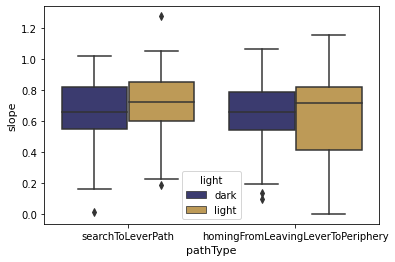

In [99]:
sns.boxplot(x="pathType",y="slope",hue="light",data=res,hue_order=["dark","light"],palette=darkLightColors())

# Figure 

There is a problem with this figure. Half of the time, the code hangs. It seems to be related to the creation of numerous gridspec objects.
The size for each plot and the font sizes should be set like in this figure.


create figure
plot examples
plot reference frame stats
plot example lever cell
plot percentage lever cells
saving /adata/projects/autopi_ca1/results/searchHomingReferenceFrame.png


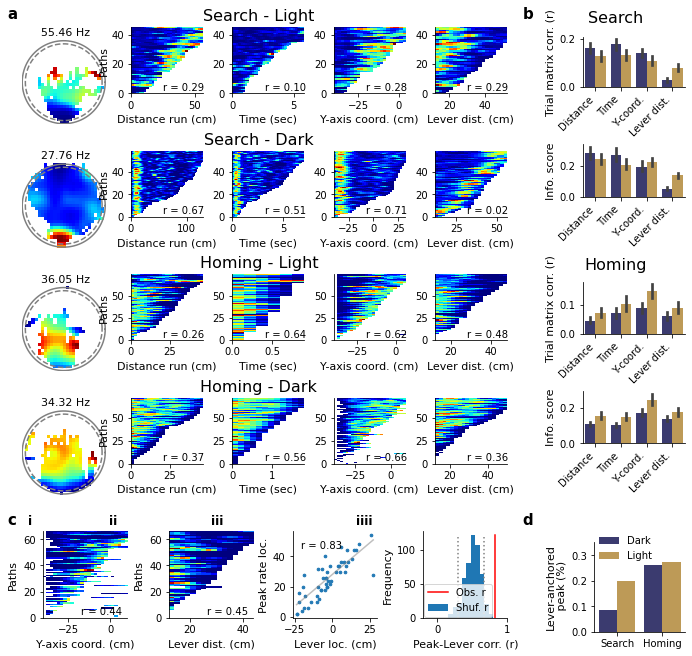

In [154]:
col=5
row=5
sizePerRow, sizePerCol = figurePanelDefaultSize()
setFigureFontSizes()


print("create figure")
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure


print("plot examples")
gsPlots = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[0],height_ratios=[4,0.25,1],width_ratios=[3.5,0.2,1])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[0,0]) 
plotExampleCellPanel(gs1,matrixYAxisX=-0.3)


print("plot reference frame stats")
#gsPlots2 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[0],height_ratios=[4,0.1,1],width_ratios=[3.5,0.2,1])
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[0,2]) 
plotReferenceFrameStats(gs2)


#gsLowerRow = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gsPlots[2],width_ratios=[3.5,1])
#gsLowerRowExample = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsLowerRow[0])
#gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[0]) 

print("plot example lever cell")
pathType="homingFromLeavingLeverToPeriphery"
light="dark"
cluId="mn9686-27102021-0106_36" #cellSelection["{}-{}".format(pathType,light)].iloc[30]
#gsPlots = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[0],height_ratios=[4,0.1,1],width_ratios=[3.5,0.2,1])
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[2,0]) 
trialPeakLeverPosPlot(gs=gs2,cluId=cluId,pathType=pathType,coordX="y",light=light,matrixYAxisX=-0.3)

print("plot percentage lever cells")
gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[2,2]) 
plotSignLeverAnchoredCells(gs2)



ax = fig.add_subplot(gs[0])
ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.197, 'c', style='normal',fontsize=15, weight="bold")
ax.text(0.76,1.0, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.76,0.197, 'd', style='normal',fontsize=15, weight="bold")

ax.text(0.03,0.197, 'i', style='normal',fontsize=12, weight="bold")
ax.text(0.15,0.197, 'ii', style='normal',fontsize=12, weight="bold")
ax.text(0.30,0.197, 'iii', style='normal',fontsize=12, weight="bold")
ax.text(0.515,0.197, 'iiii', style='normal',fontsize=12, weight="bold")

ax.axis("off")


fn = myProject.dataPath+"/results/searchHomingReferenceFrame.png"
print("saving",fn)
plt.savefig(fn)

New figure for the paper. More than one example per condition. Fewer behavioral variables to give more weight to the cell encoding information about the lever position.

Examples
Stats
example lever anchored
saving /adata/projects/autopi_ca1/results/fig4.png


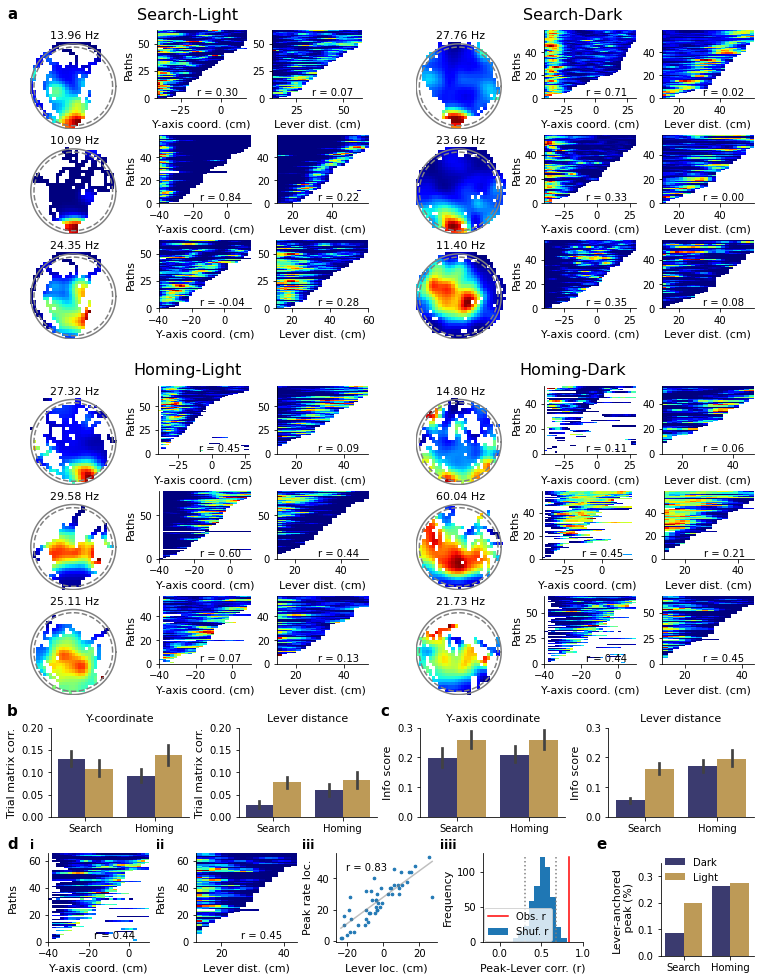

In [158]:
col=5.5
row=7.5
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig) # all our figure

gsPlots = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=gs[0],height_ratios=[5.5,0.1,1,0.1,1])

print("Examples")
gsOnePlotx = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[0])
plotExamplesFourConditions(gsOnePlotx)
    
print("Stats")
gsOnePloty = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPlots[2])
statRow(gsOnePloty)


print("example lever anchored")

pathType="homingFromLeavingLeverToPeriphery"
light="dark"
cluId="mn9686-27102021-0106_36" #cellSelection["{}-{}".format(pathType,light)].iloc[30]
gs2 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gsPlots[4,0],width_ratios=[4,0.1,1])
gs20 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs2[0])
trialPeakLeverPosPlot(gs=gs20,cluId=cluId,pathType=pathType,coordX="y",light=light,matrixYAxisX=-0.3)



gs22 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs2[2])
plotSignLeverAnchoredCells(gs22)


ax = fig.add_subplot(gs[0])
ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.27, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.5,0.27, 'c', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.13, 'd', style='normal',fontsize=15, weight="bold")
ax.text(0.79,0.13, 'e', style='normal',fontsize=15, weight="bold")

ax.text(0.03,0.13, 'i', style='normal',fontsize=12, weight="bold")
ax.text(0.20,0.13, 'ii', style='normal',fontsize=12, weight="bold")
ax.text(0.395,0.13, 'iii', style='normal',fontsize=12, weight="bold")
ax.text(0.58,0.13, 'iiii', style='normal',fontsize=12, weight="bold")

ax.axis("off")


fn = myProject.dataPath+"/results/fig4.png"
print("saving",fn)
plt.savefig(fn)